# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Context

Pre-owned vehicle dealership operates in a highly competitive and price-sensitive market. Success hinges on curating the right mix of inventory and implementing data-informed pricing strategies that not only attract prospective buyers but also maximize profit margins. 

The user car Price are influenced by many factors such as  -  Year, Brand, Type, Title status, Condition, Odometer, drive 

As a usercar dealersip I want to know 
- What do buyers value most in used cars?
- What features increase or decreses the resale Price?


#### Business Goals
- Understand key features that affect the price of used cars
- Price optimally to attract buyers
- Prioritize inventory strategy towards cars with high-value features
- Improve marketing by highlighting features consumers value most.

### Business Questions
- What car characteristics are most strongly associated with higher or lower prices?
- How does year affect the car price?
- Does brand, model, type affect pricing?
- Does Odometer reading have more impact than year?
- Does color, condition, title status impact pricing?




### Success Criteria
- Clear identification of top price-driving factors.
- Easy-to-interpret visualizations or models to support decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [160]:
import pandas as pd
import seaborn as sns
import numpy as np
   
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance



In [99]:
def plot_price_vs_feature(df, feature, kind='scatter'):
    plt.figure(figsize=(20,12))
    
    if kind == 'scatter':
        sns.scatterplot(x=feature, y='price', data=df, alpha=0.3)
    elif kind == 'box':
        sns.boxplot(x=feature, y='price', data=df)
        plt.xticks(rotation=45)
    elif kind == 'bar':
        # Calculate mean price per category
        avg_price = df.groupby(feature)['price'].mean().sort_values()
        sns.barplot(x=avg_price.index, y=avg_price.values)
        plt.xticks(rotation=45)
        plt.ylabel('Average Price (USD)')
    else:
        raise ValueError("kind must be 'scatter', 'box', or 'bar'")
        
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    if kind != 'bar':
        plt.ylabel('Price (USD)')
    plt.show()

    
def plot_count_vs_feature(df, feature, kind='bar'):
    warnings.filterwarnings("ignore") # Suppress warnings for cleaner output
    plt.figure(figsize=(20,12))
    
    if kind == 'bar':
        order = df[feature].value_counts().index
        sns.countplot(x=feature, data=df, order=order, palette='pastel')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
    elif kind == 'hist':
        sns.histplot(df[feature], bins=30, kde=False, color=sns.color_palette('pastel')[0])
        plt.ylabel('Count')
    else:
        raise ValueError("kind must be 'bar' or 'hist'")
    
    plt.title(f'Count vs {feature}')
    plt.xlabel(feature)
    plt.show()

In [113]:

# Load the dataset
df = pd.read_csv('data/vehicles.csv', index_col= 'id')

# total rows and columns
print(f'Total rows: {df.shape[0]}, Total columns: {df.shape[1]}')



# Display 10 random samples
df.sample(10)


Total rows: 426880, Total columns: 17


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7303486307,columbus,6500,2007.0,honda,odyssey,good,4 cylinders,gas,180000.0,clean,automatic,NaN,fwd,NaN,mini-van,blue,oh
7313751247,boston,19990,2013.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,62039.0,clean,other,JTHBK1GG7D2046820,fwd,NaN,sedan,NaN,ma
7313946182,lexington,13400,2007.0,toyota,fj cruiser 4wd,excellent,6 cylinders,gas,170000.0,clean,automatic,NaN,4wd,full-size,SUV,yellow,ky
7313527390,gainesville,0,2011.0,nissan,rogue,NaN,NaN,gas,157090.0,clean,automatic,JN8AS5MV3BW281684,4wd,NaN,SUV,black,fl
7316393603,inland empire,1,2000.0,NaN,Any,NaN,NaN,other,1000.0,clean,other,NaN,NaN,NaN,NaN,NaN,ca
7315022365,columbia / jeff city,27995,2016.0,chevrolet,silverado,NaN,8 cylinders,gas,153943.0,clean,automatic,3GCUKREC5GG271340,4wd,NaN,pickup,white,mo
7303403977,columbia / jeff city,28063,2018.0,chevrolet,traverse,NaN,NaN,gas,70819.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mo
7315716771,"st louis, MO",7995,2001.0,ford,ranger,NaN,NaN,gas,164329.0,clean,automatic,1FTZR15E01TA96588,4wd,NaN,NaN,white,il
7313508460,charlotte,22995,2012.0,ford,f-350,NaN,NaN,diesel,210000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,nc


In [114]:
# table with % missing
missing_df = (df.isnull().sum() / len(df)) * 100
missing_df = missing_df[missing_df > 0].sort_values(ascending=False).to_frame(name='% Missing')



key_columns = [
    'price', 'year', 'manufacturer', 'model',
    'condition', 'cylinders', 'fuel', 'odometer',
    'title_status', 'transmission', 'drive', 'size',
    'type', 'paint_color'
]

# Calculate percentage of non-null values
non_null_percent = (df[key_columns].notnull().mean() * 100).round(2)

# Sort by percentage in descending order
non_null_percent = non_null_percent.sort_values(ascending=False)

print(non_null_percent)

price           100.00
year             99.72
transmission     99.40
fuel             99.29
odometer         98.97
model            98.76
title_status     98.07
manufacturer     95.87
type             78.25
paint_color      69.50
drive            69.41
condition        59.21
cylinders        58.38
size             28.23
dtype: float64


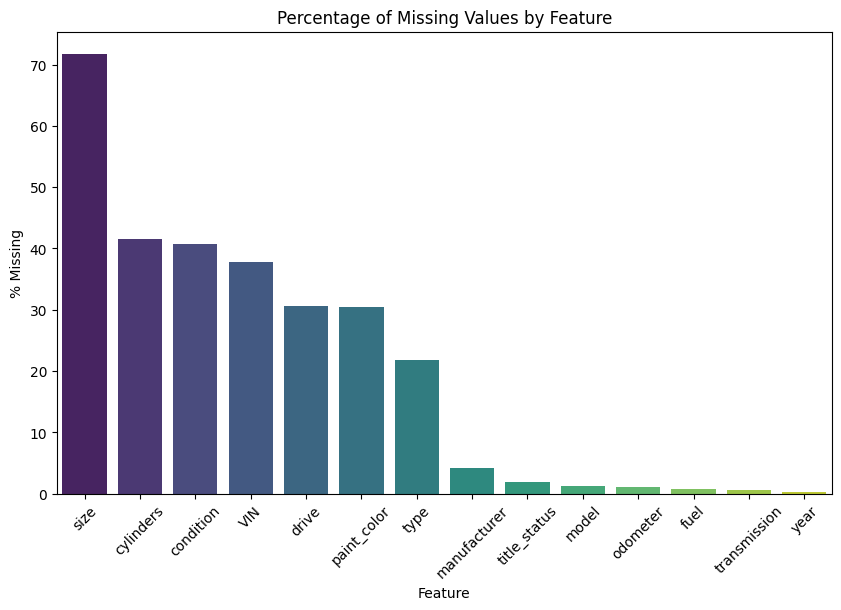

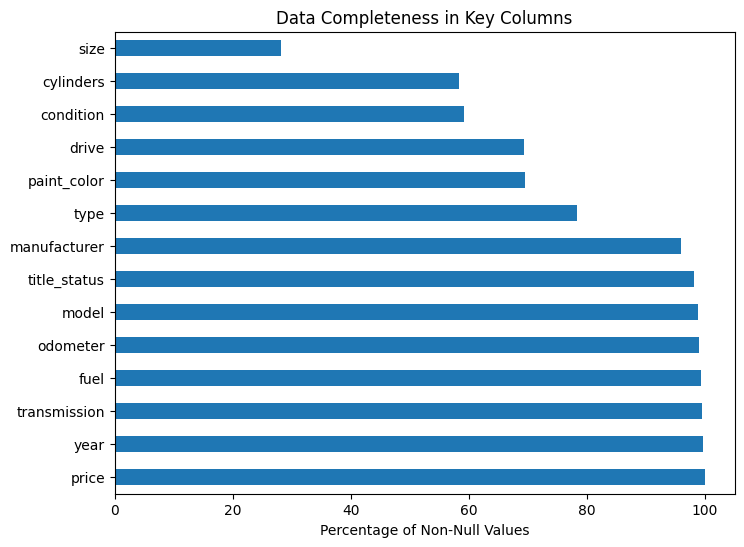

In [115]:
# plot missing % values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df['% Missing'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('% Missing')
plt.xlabel('Feature')
plt.show()

non_null_percent.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Percentage of Non-Null Values')
plt.title('Data Completeness in Key Columns')
plt.show()

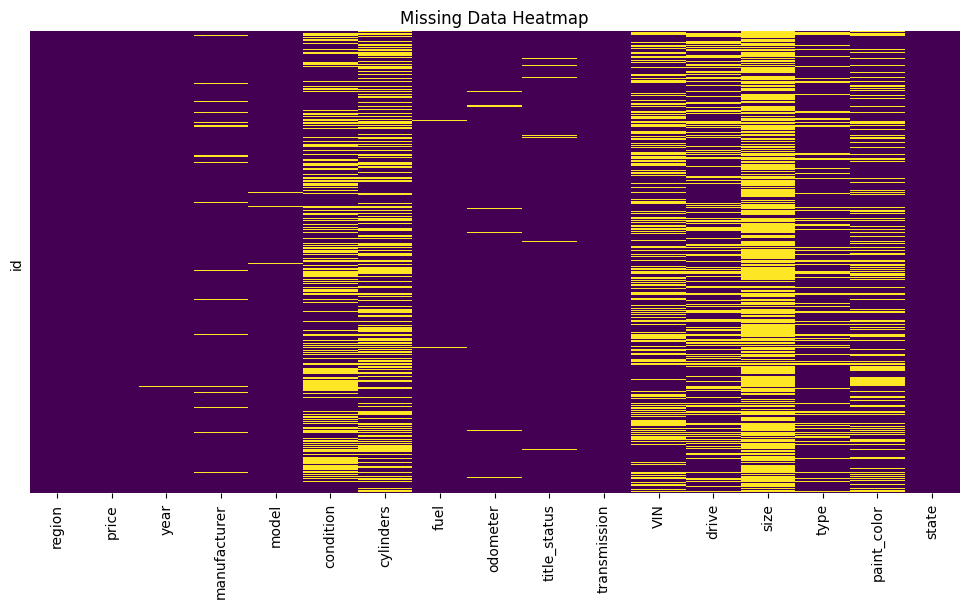

In [116]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

The following columns have a lot of missing data and may skew the results
-              % Missing
- size          71.767476
- cylinders     41.622470
- condition     40.785232
- VIN           37.725356
- drive         30.586347
- paint_color   30.501078
- type          21.752717

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [131]:
# max and min values for 'price' and 'year'
print("Max price:", df['price'].max())
print("Min price:", df['price'].min())

# count of prices above 100000
high_price_count = (df['price'] > 100000).sum()
print("Count of prices above 100000:", high_price_count)

# odometer statistics
print("Odometer - Max:", df['odometer'].max())
print("Odometer - Min:", df['odometer'].min())
# count of odometer values above 500000
high_odometer_count = (df['odometer'] > 500000).sum()
print("Count of odometer values above 500000:", high_odometer_count)

df_rule_clean = df[
    (df['price'] >= 100) & (df['price'] <= 300000) &
    (df['odometer'] >= 0) & (df['odometer'] <= 1000000) &
    (df['year'] >= 1980) & (df['year'] <= datetime.datetime.now().year)
].copy()

# --- IQR-BASED PRICE OUTLIER REMOVAL ---
Q1 = df_rule_clean['price'].quantile(0.25)
Q3 = df_rule_clean['price'].quantile(0.75)
IQR = Q3 - Q1

price_lower_bound = Q1 - 1.5 * IQR
price_upper_bound = Q3 + 1.5 * IQR

df_clean_final = df_rule_clean[
    (df_rule_clean['price'] >= price_lower_bound) &
    (df_rule_clean['price'] <= price_upper_bound)
].copy()

# --- SUMMARY ---
original_size = len(df)
rule_clean_size = len(df_rule_clean)
final_clean = len(df_clean_final)

retained_rule = round(100 * rule_clean_size / original_size, 2)
retained_final = round(100 * final_clean / original_size, 2)

print(f"Original size: {original_size}")
print(f"After rule-based cleaning: {rule_clean_size} ({retained_rule}%)")
print(f"After IQR cleaning: {final_clean} ({retained_final}%)")



df_clean_final['car_age'] = datetime.datetime.now().year  - df_clean_final['year']

df_clean_final.head()

Max price: 3736928711
Min price: 0
Count of prices above 100000: 655
Odometer - Max: 10000000.0
Odometer - Min: 0.0
Count of odometer values above 500000: 1386
Original size: 426880
After rule-based cleaning: 378855 (88.75%)
After IQR cleaning: 371788 (87.09%)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,car_age
id,,,,,,,,,,,,,,,,,,
7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,11.0
7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,15.0
7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,5.0
7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,8.0
7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,12.0


        Feature  Importance
0       car_age    0.549036
1     cylinders    0.235302
2      odometer    0.110311
3          fuel    0.048555
4  transmission    0.031137
5         drive    0.023063
6  title_status    0.001323
7          type    0.001273
8  manufacturer    0.000000
9     condition    0.000000


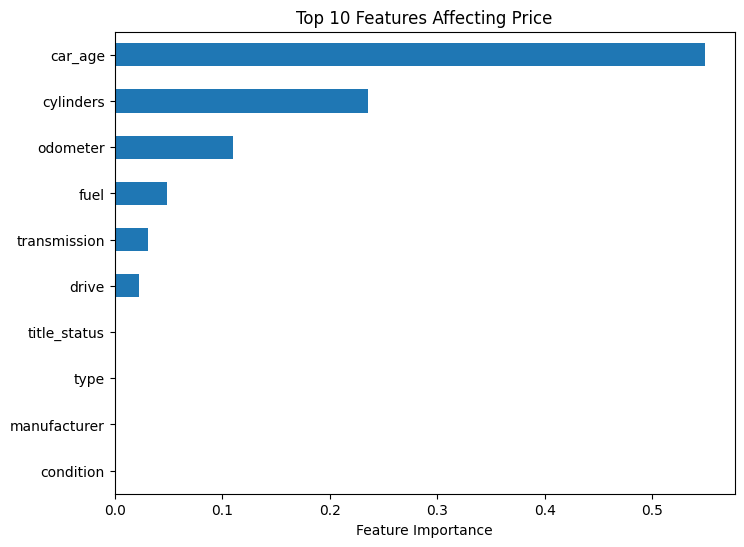

In [151]:

# Select features (you can customize this list)
features = ['car_age', 'odometer', 'manufacturer', 'condition', 'cylinders',
            'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

df_model_Cat = df_clean_final.dropna(subset=features)

X = df_model_Cat[features]
y = df_model_Cat['price']

# Separate numeric & categorical
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns

# Encode categoricals with OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat = encoder.fit_transform(X[cat_cols])
X_num = X[num_cols].values

# Combine
X_final = np.hstack([X_num, X_cat])
all_feature_names = list(num_cols) + list(cat_cols)

# Train decision tree
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_final, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=all_feature_names)
importances = importances.sort_values(ascending=False)

# Show top features
top_features = importances.head(10)
print(top_features.reset_index().rename(columns={'index': 'Feature', 0: 'Importance'}))

# Plot
top_features.plot(kind='barh', figsize=(8, 6))
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Affecting Price')
plt.gca().invert_yaxis()
plt.show()

In [152]:
df_model_Cat.describe()
df_model_Cat.head()


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,car_age
id,,,,,,,,,,,,,,,,,,
7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,12.0
7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al,13.0
7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al,9.0
7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al,6.0
7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al,9.0


In [153]:
# drop duplicates for vin,manufacturer,model,year,price keep the last occurrence
df_model_Cat = df_model_Cat.drop_duplicates(subset=['VIN', 'manufacturer', 'model', 'year', 'price'], keep='last')

# drop low impact features id, VIN,size, region
df_model_Cat = df_model_Cat.drop(columns=['id', 'VIN', 'size', 'region'], errors='ignore')



In [154]:

df_model_Cat.head()

#get row count with any NaN values  
nan_row_count = df_model_Cat.isnull().any(axis=1).sum()
print(f"Row count with any NaN values: {nan_row_count}")    

#total rows after dropping NaN values
df_model_Cat = df_model_Cat.dropna()
print(f"Total rows after dropping NaN values: {len(df_model_Cat)}")


Row count with any NaN values: 766
Total rows after dropping NaN values: 71765


In [150]:
df_model_Cat.to_csv('data/vehicles_cleaned.csv', index=False)

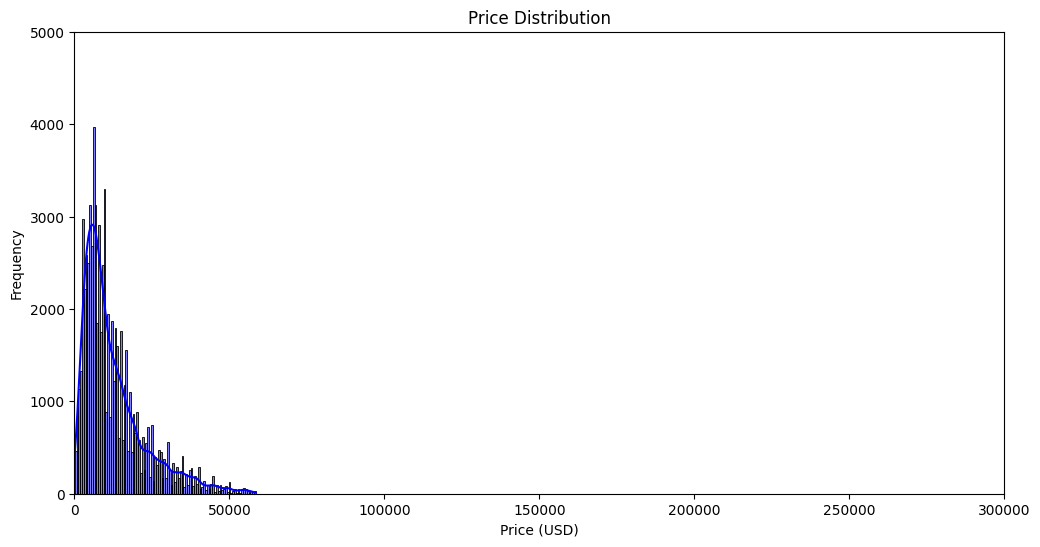

In [156]:
# plot price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_model_Cat['price'], bins=100, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xlim(0, 300000)
plt.ylim(0, 5000)
plt.show()


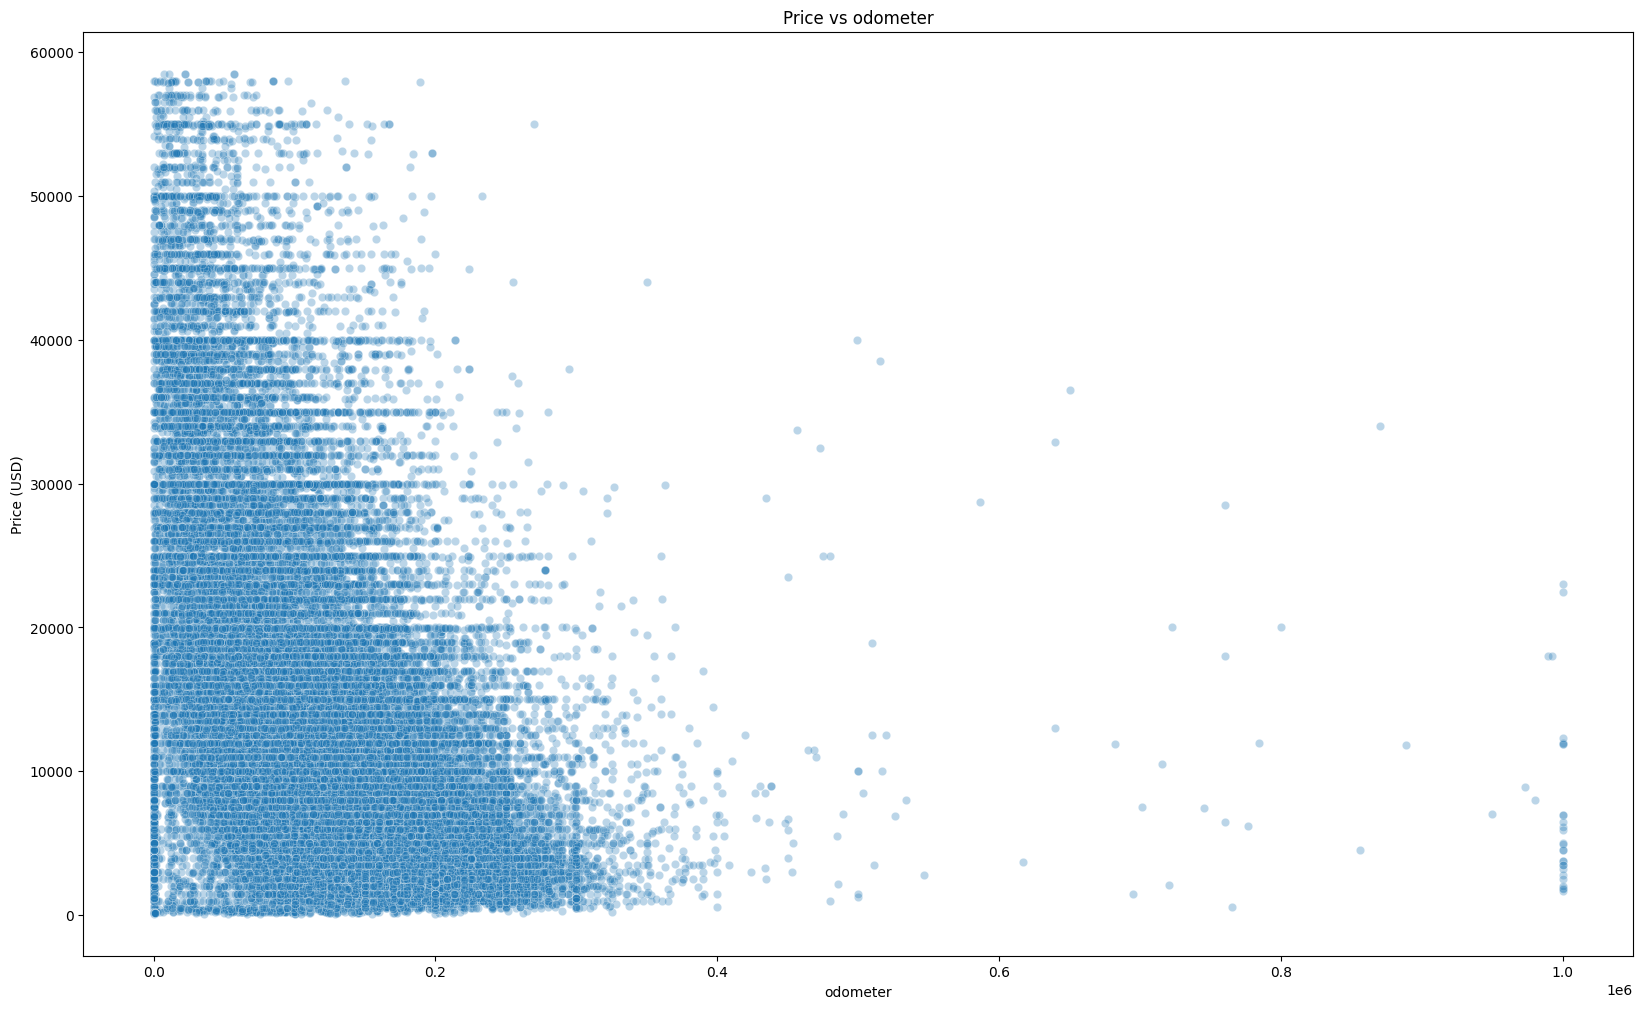

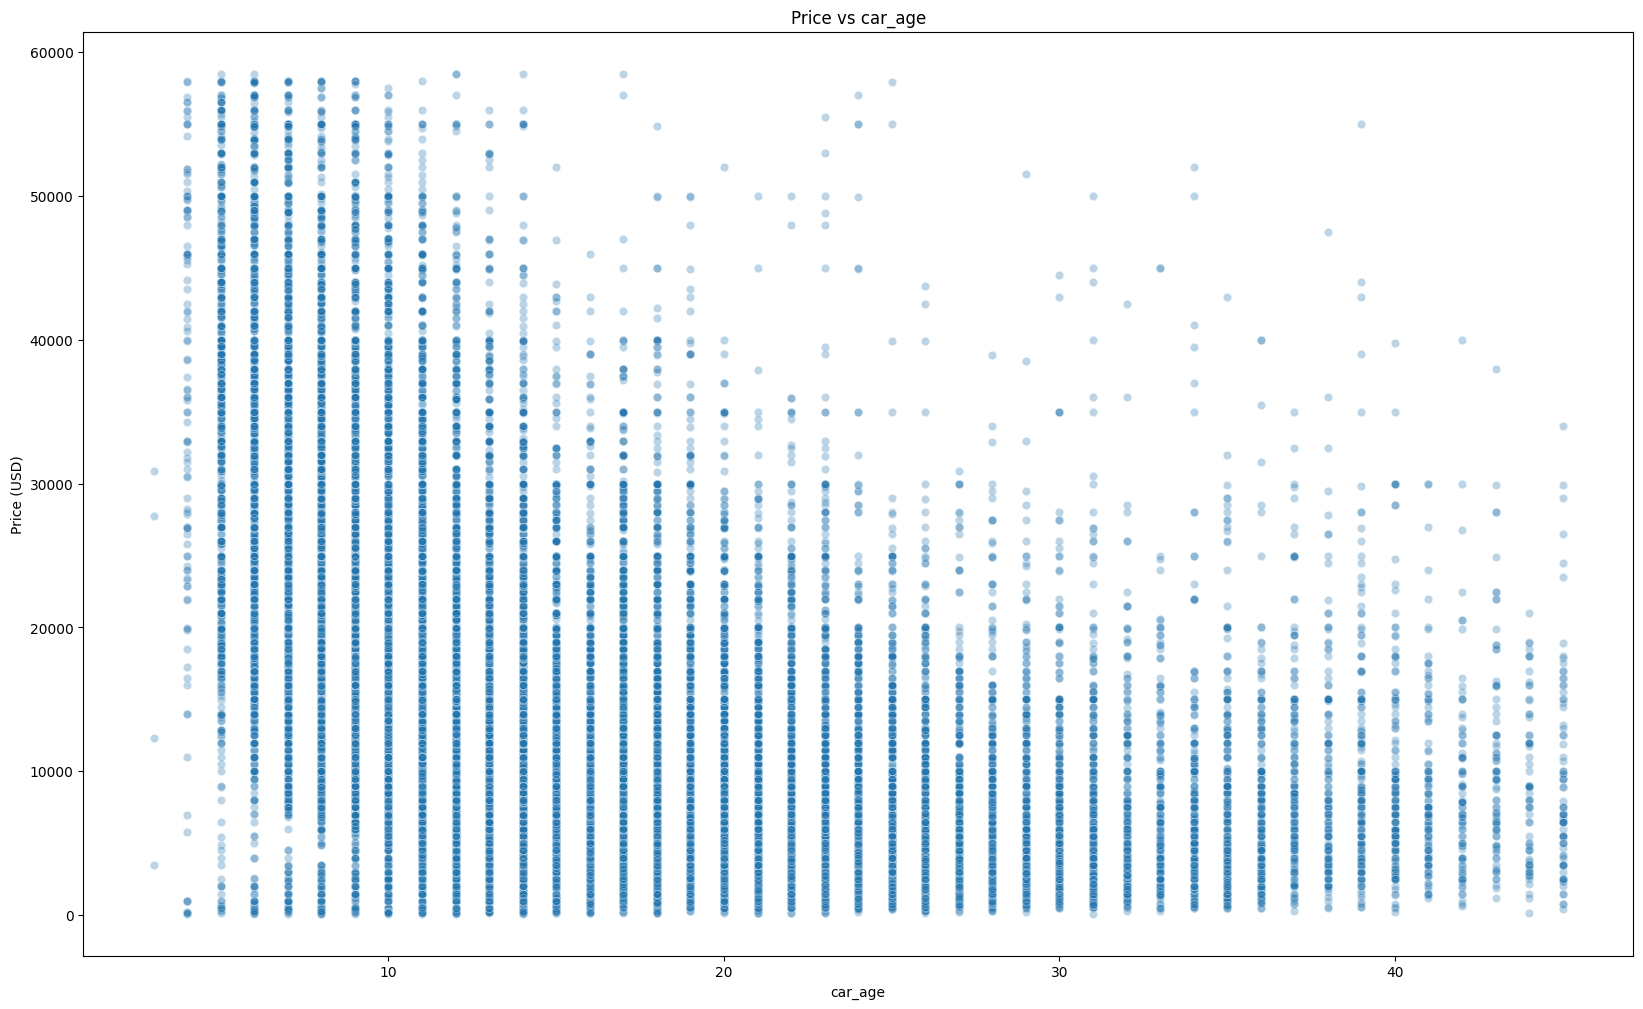

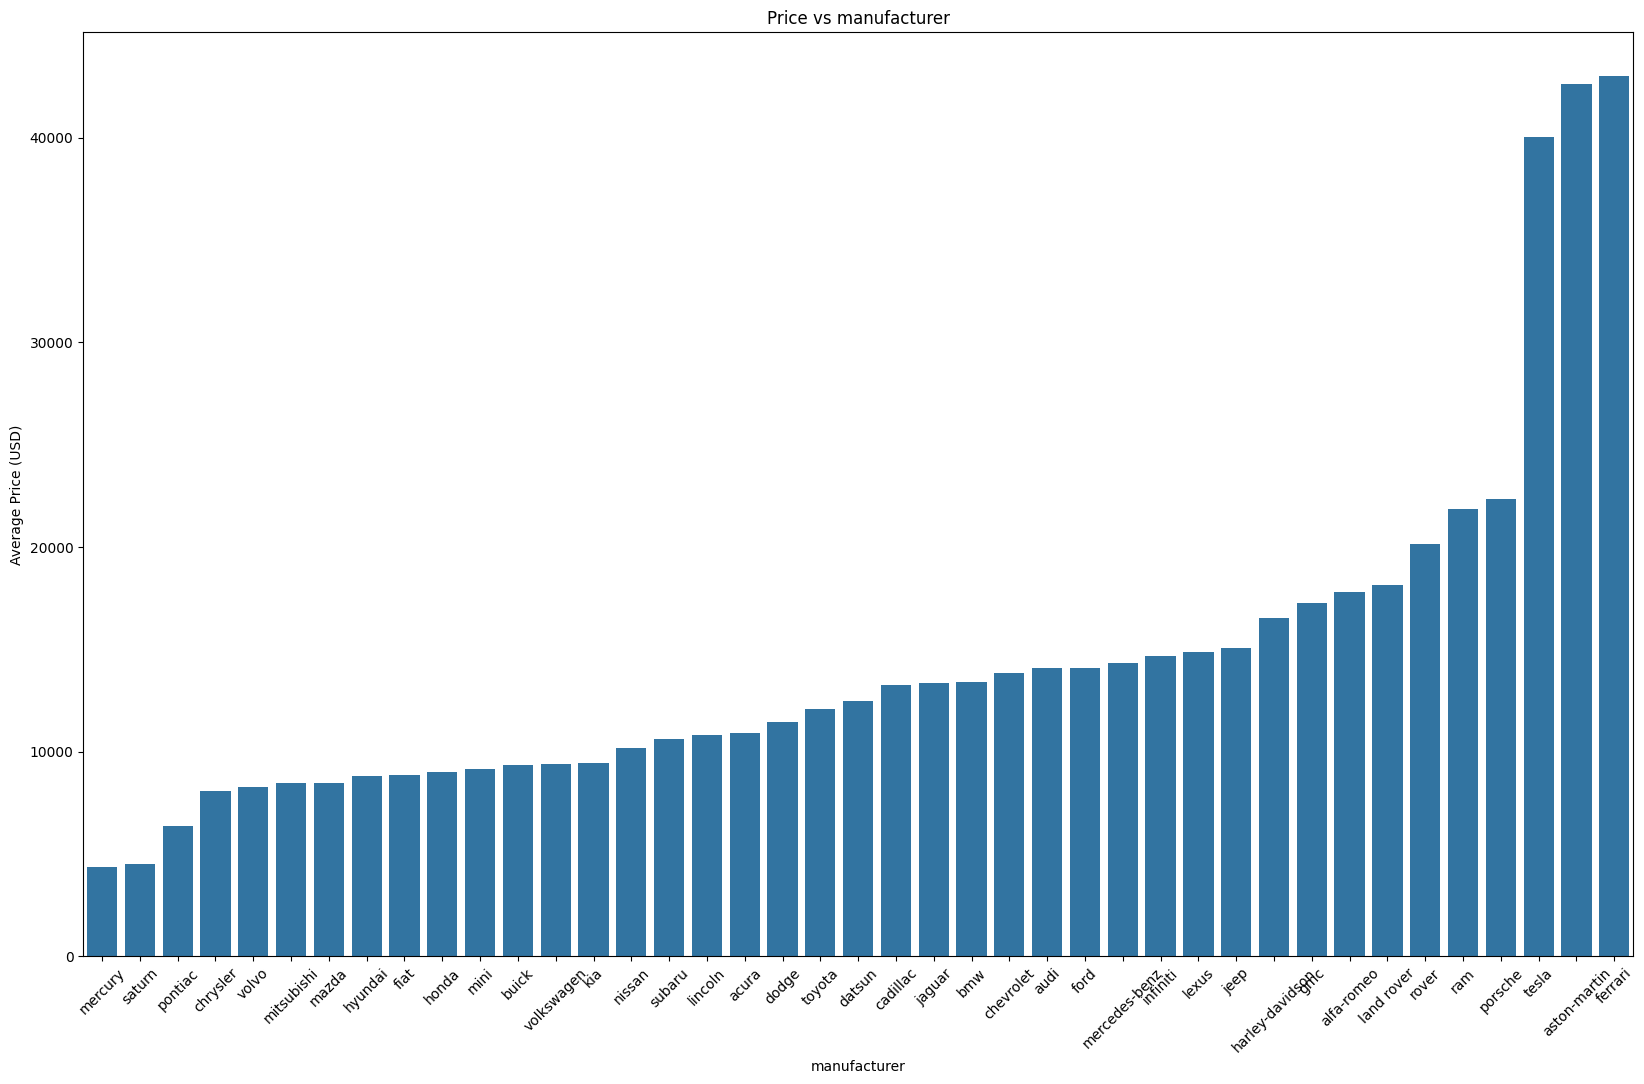

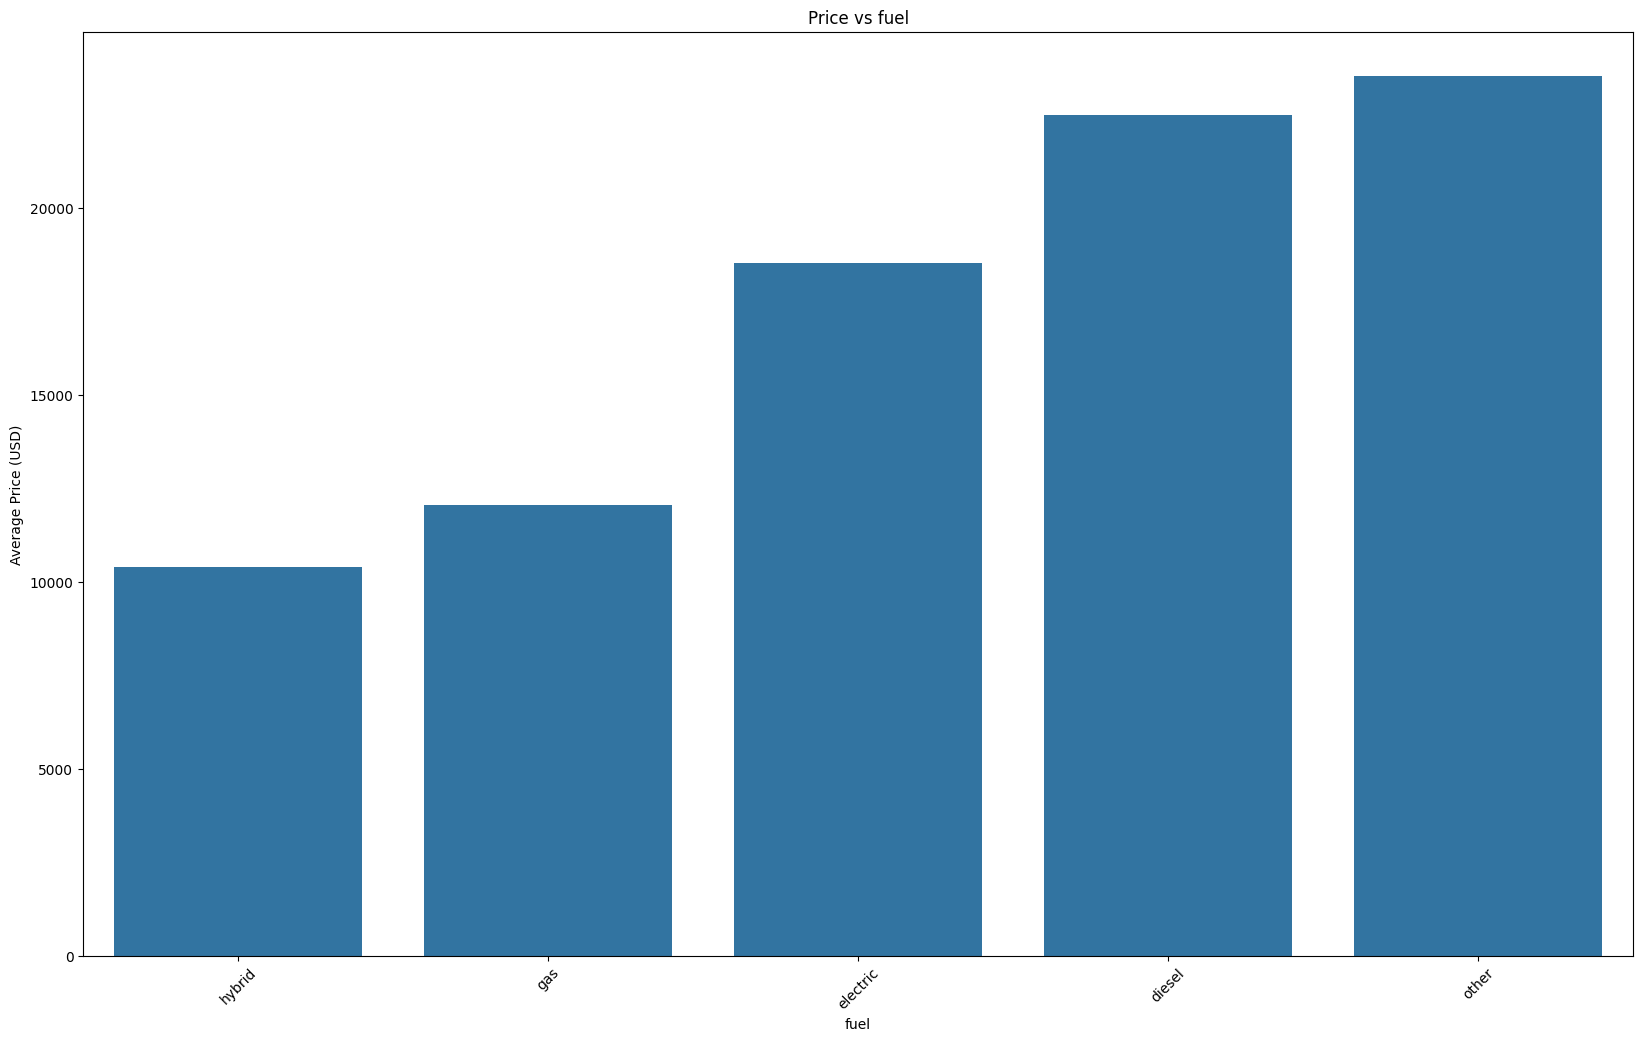

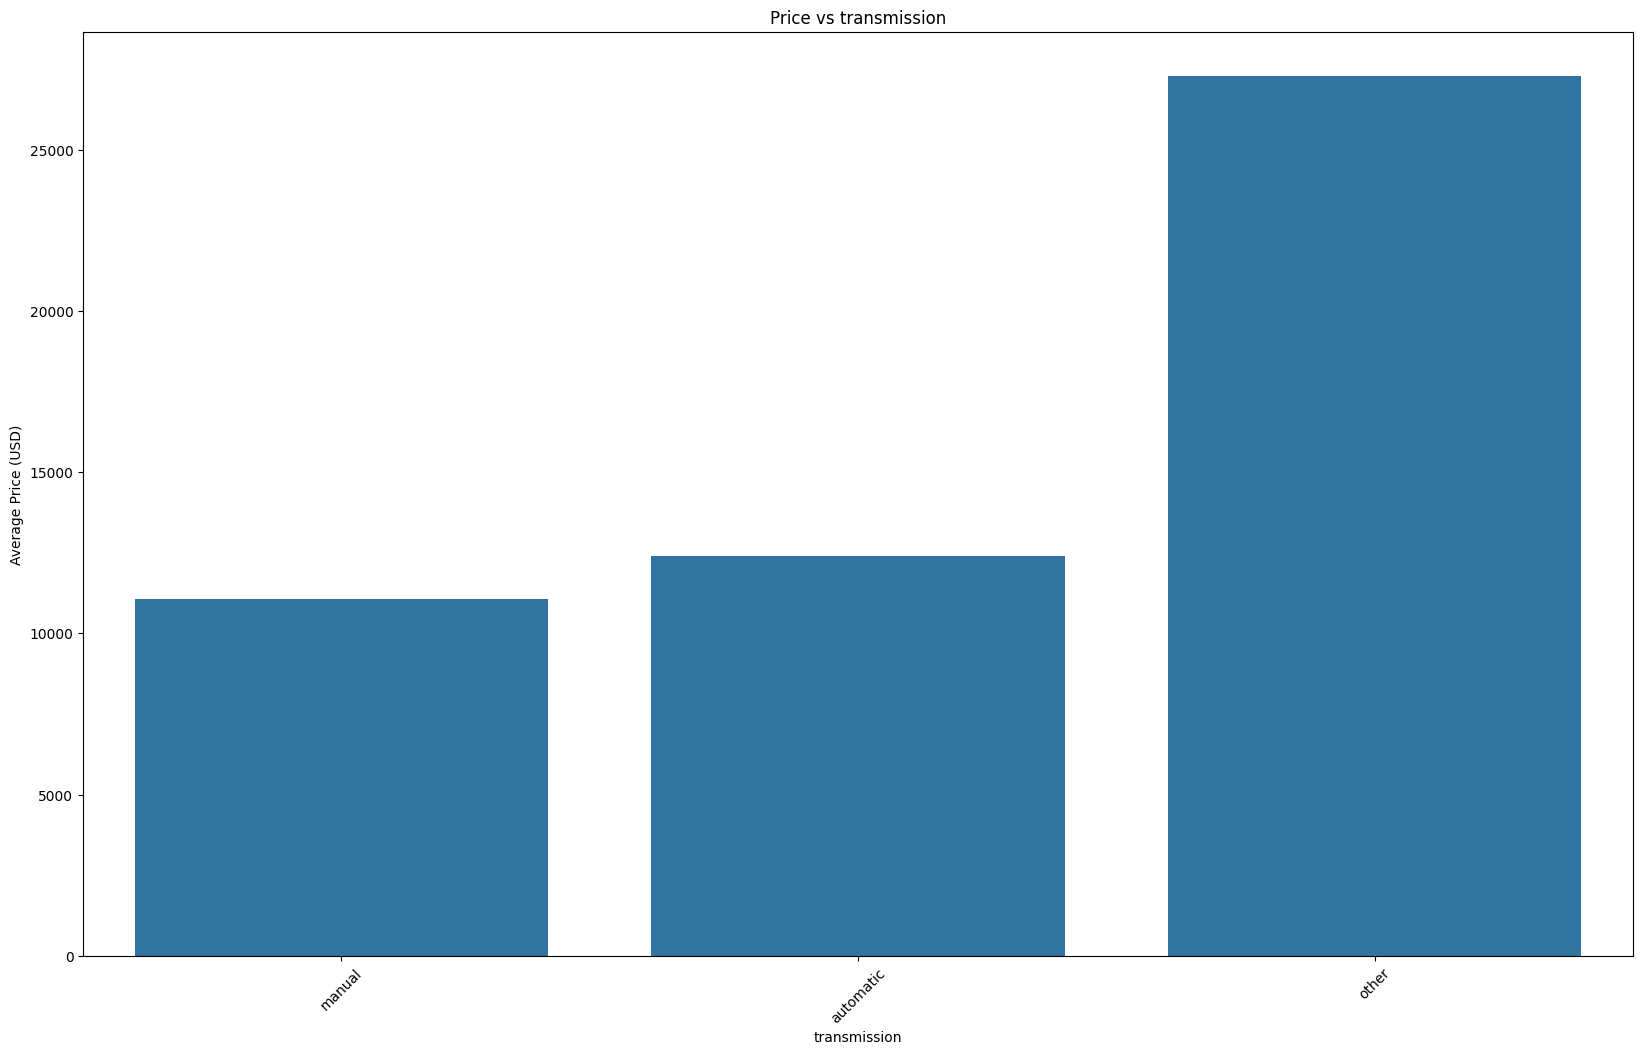

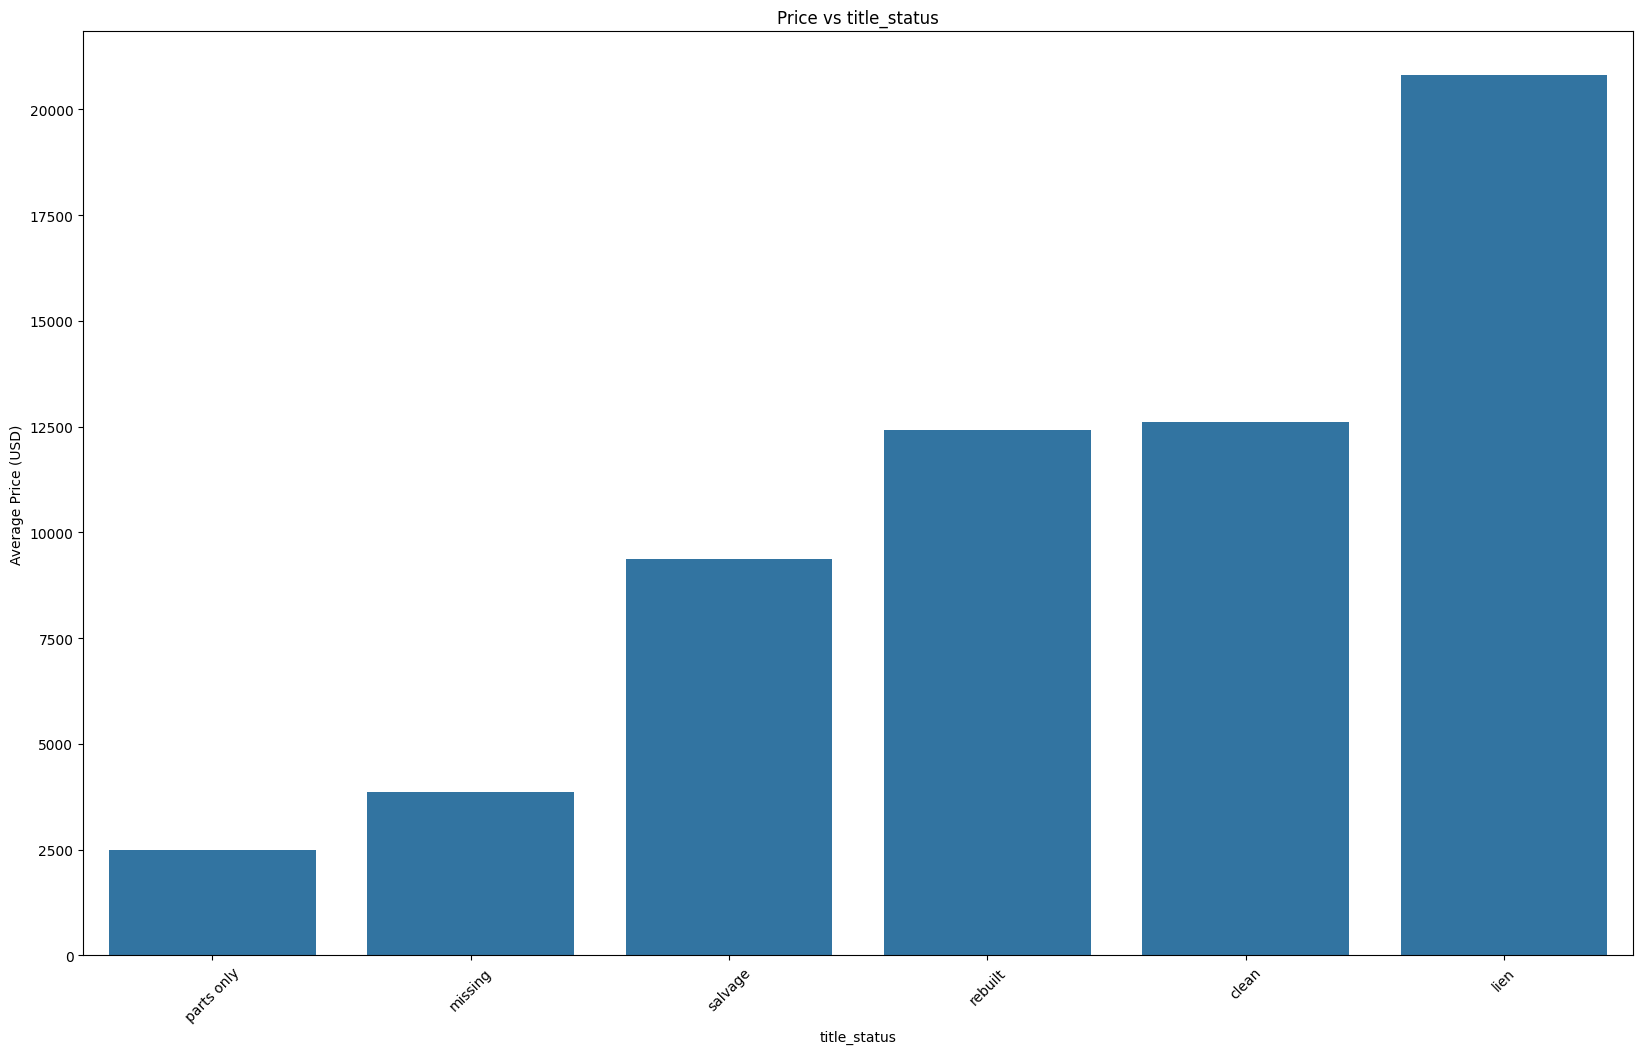

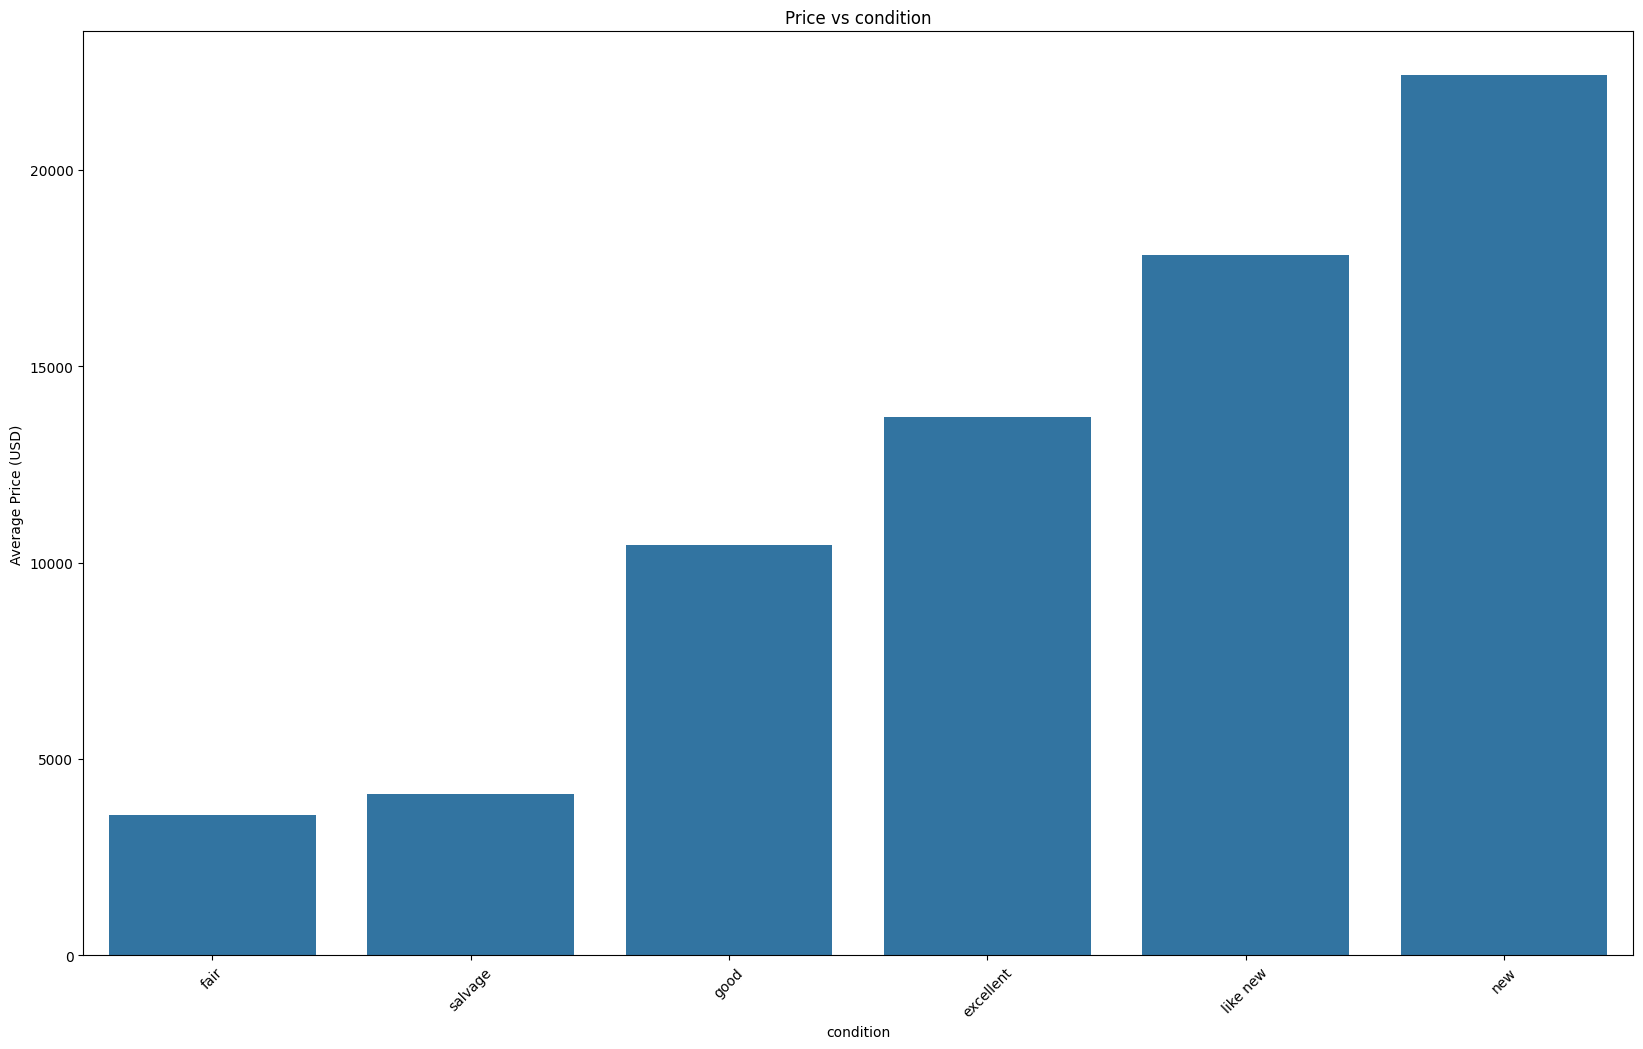

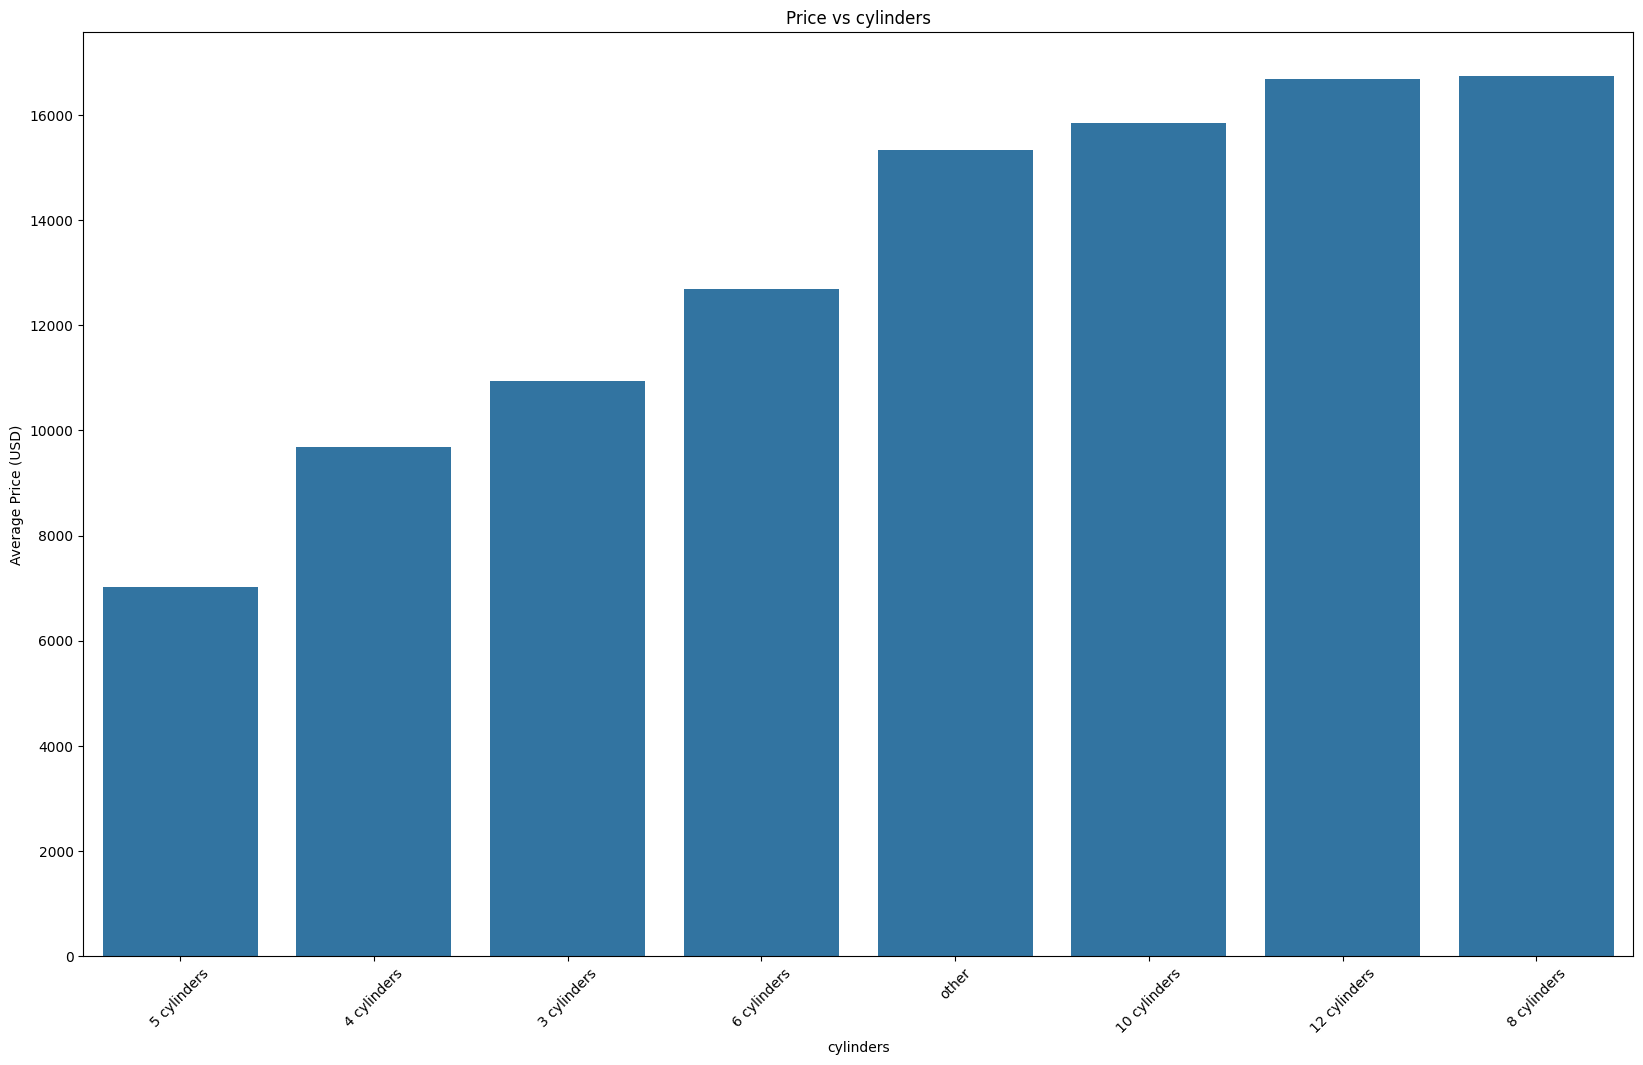

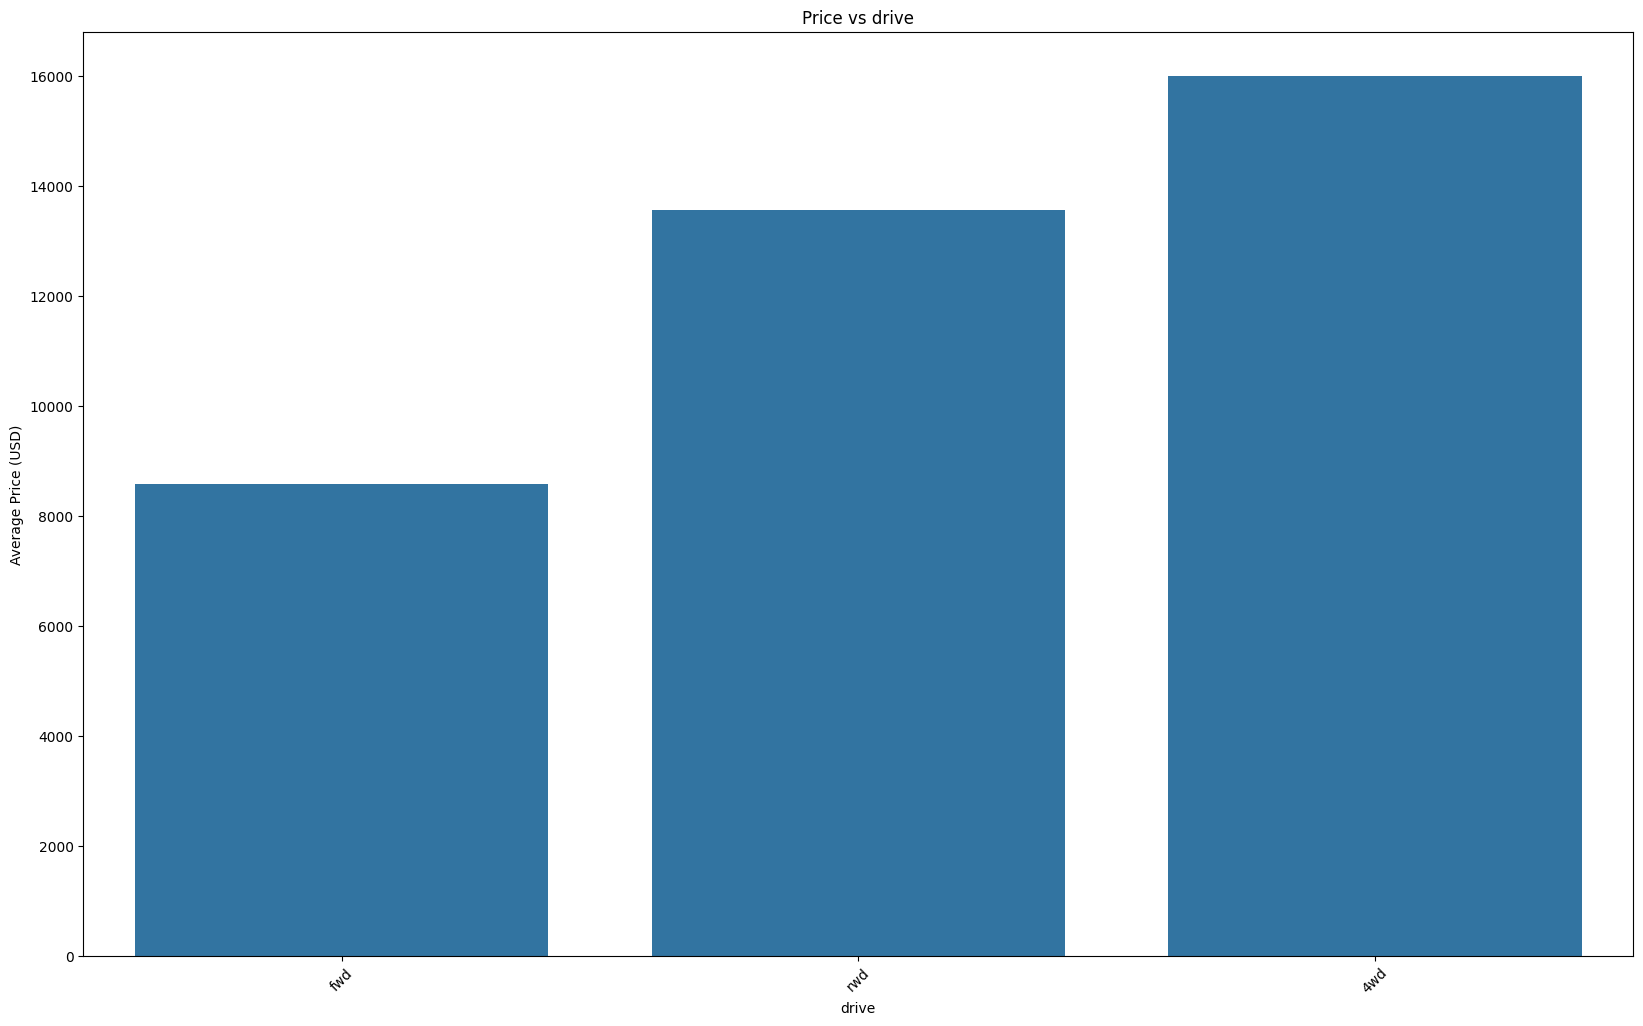

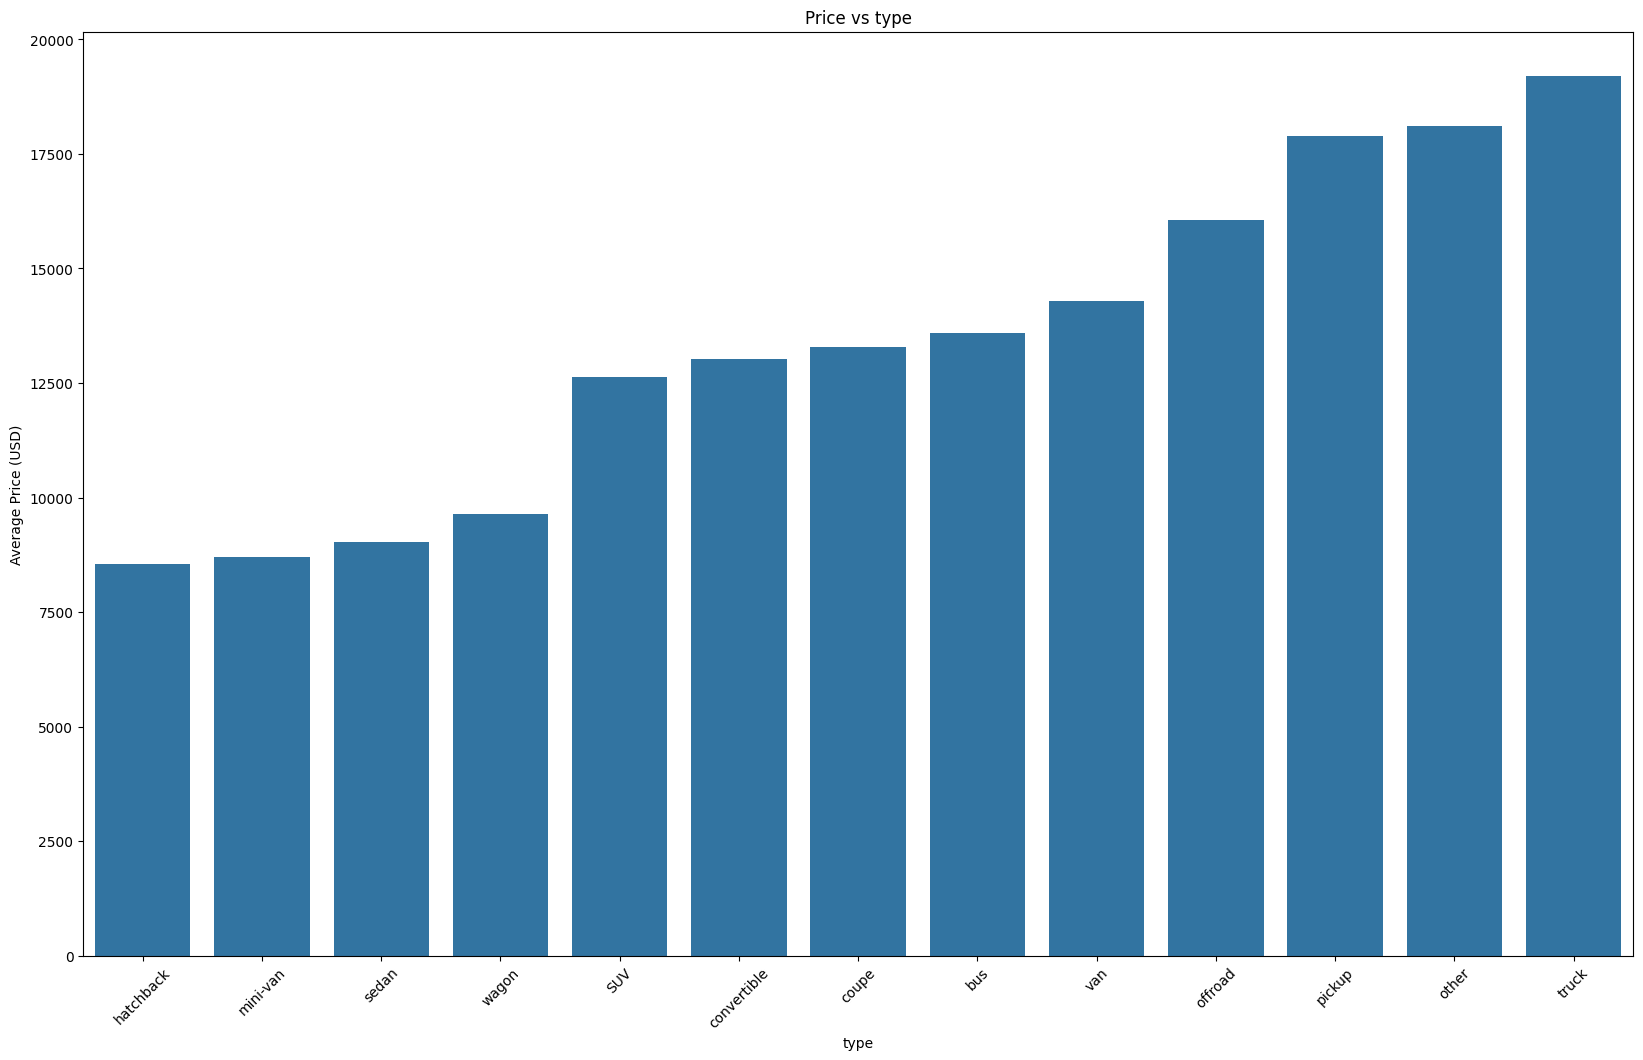

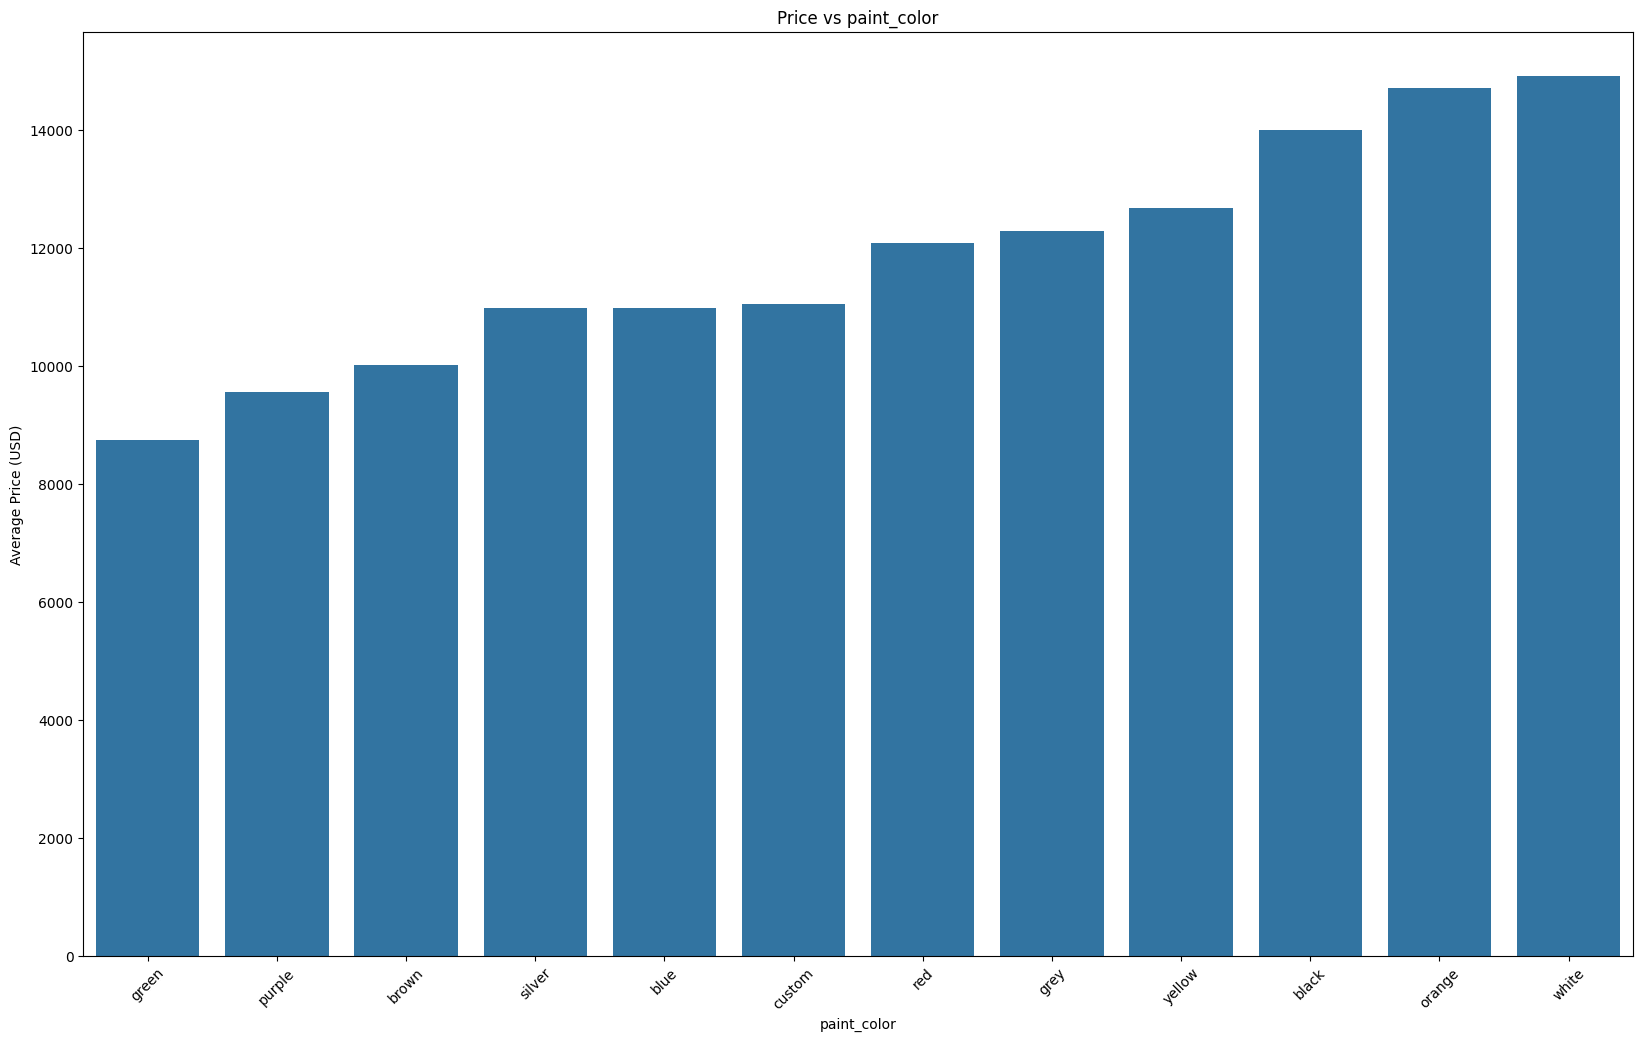

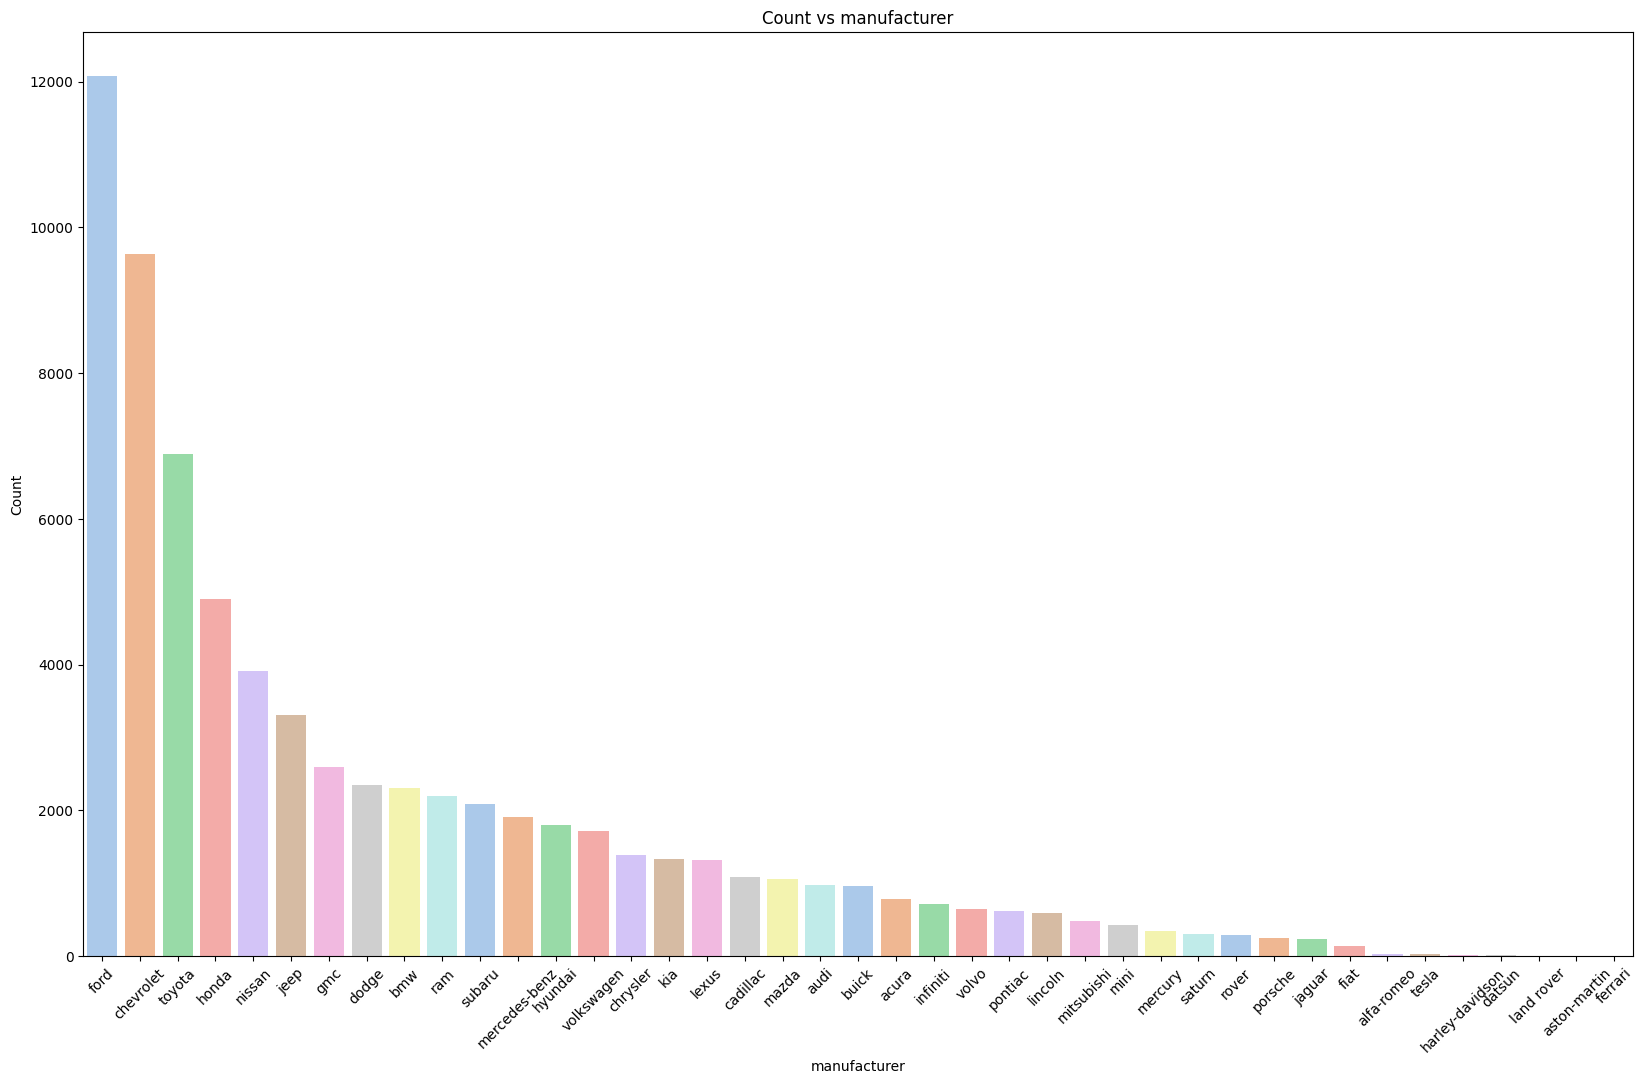

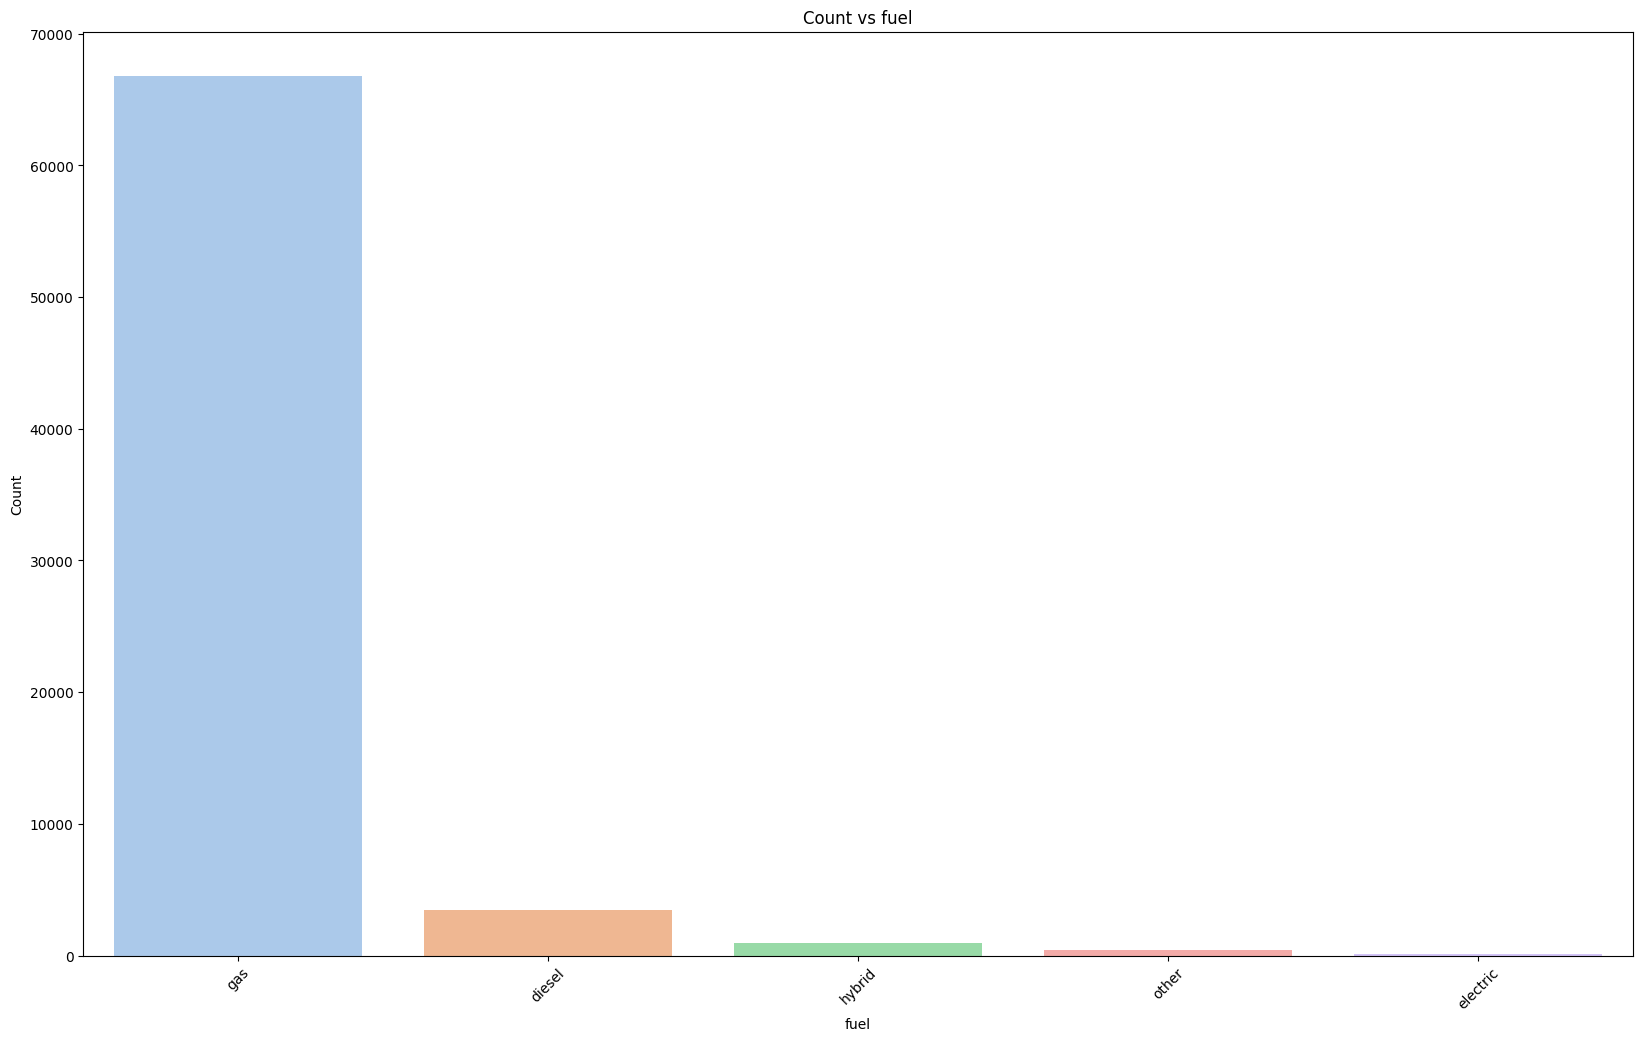

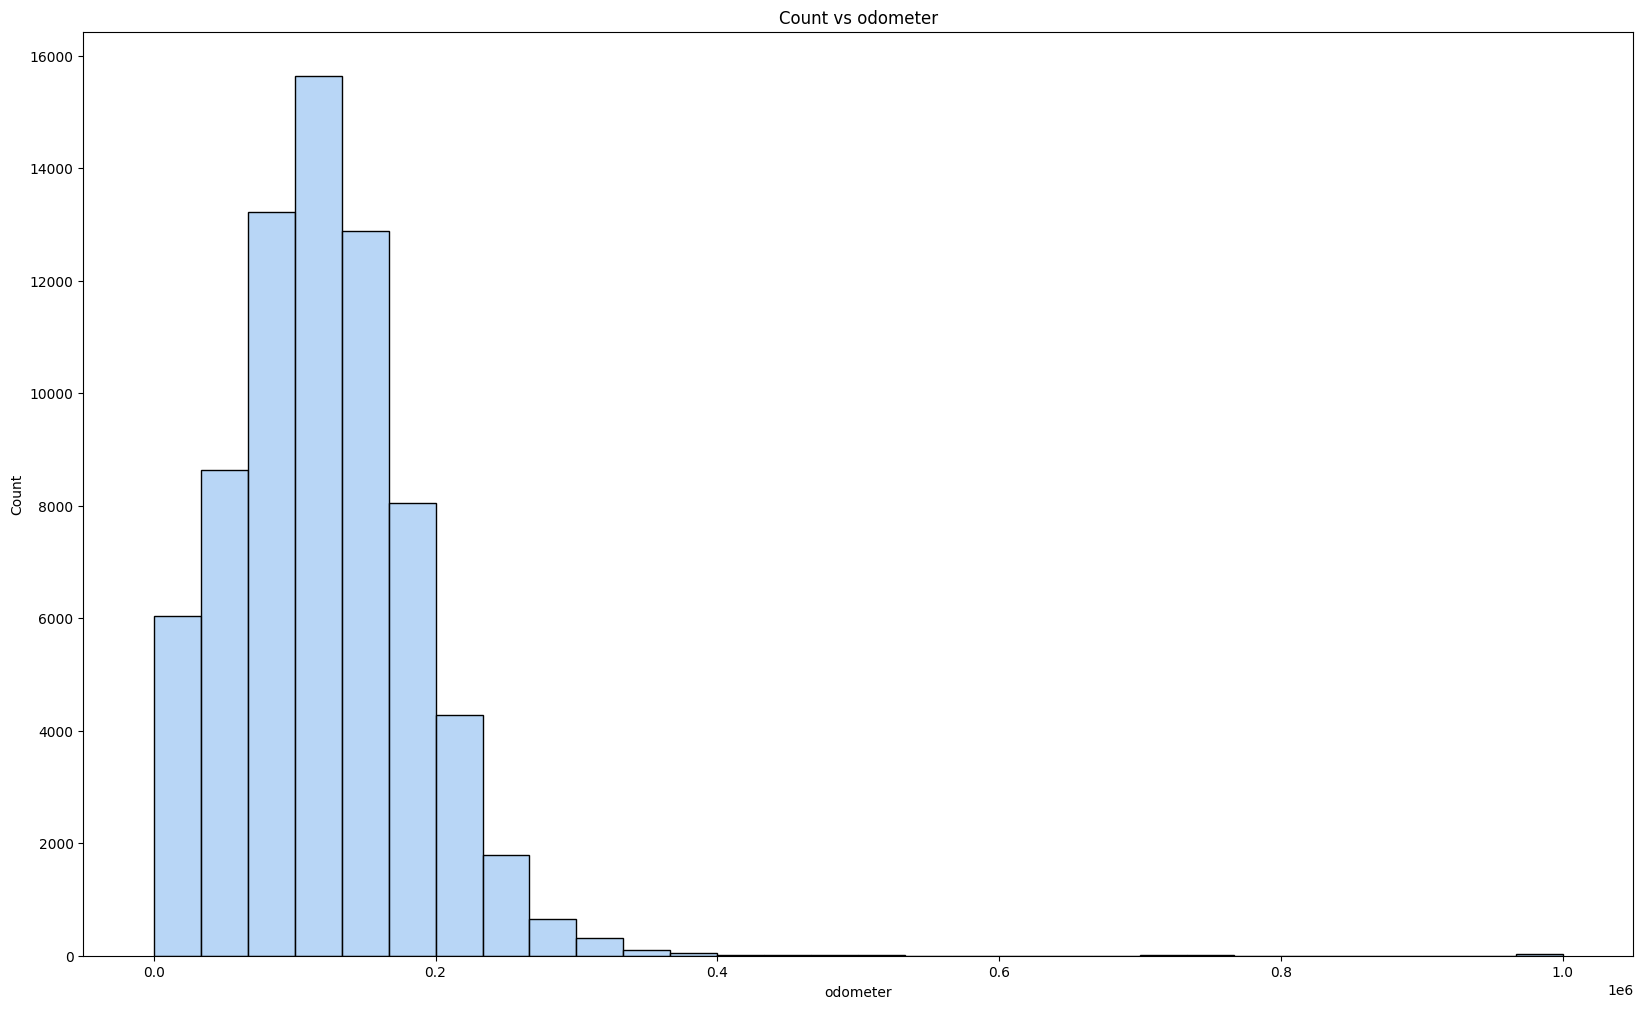

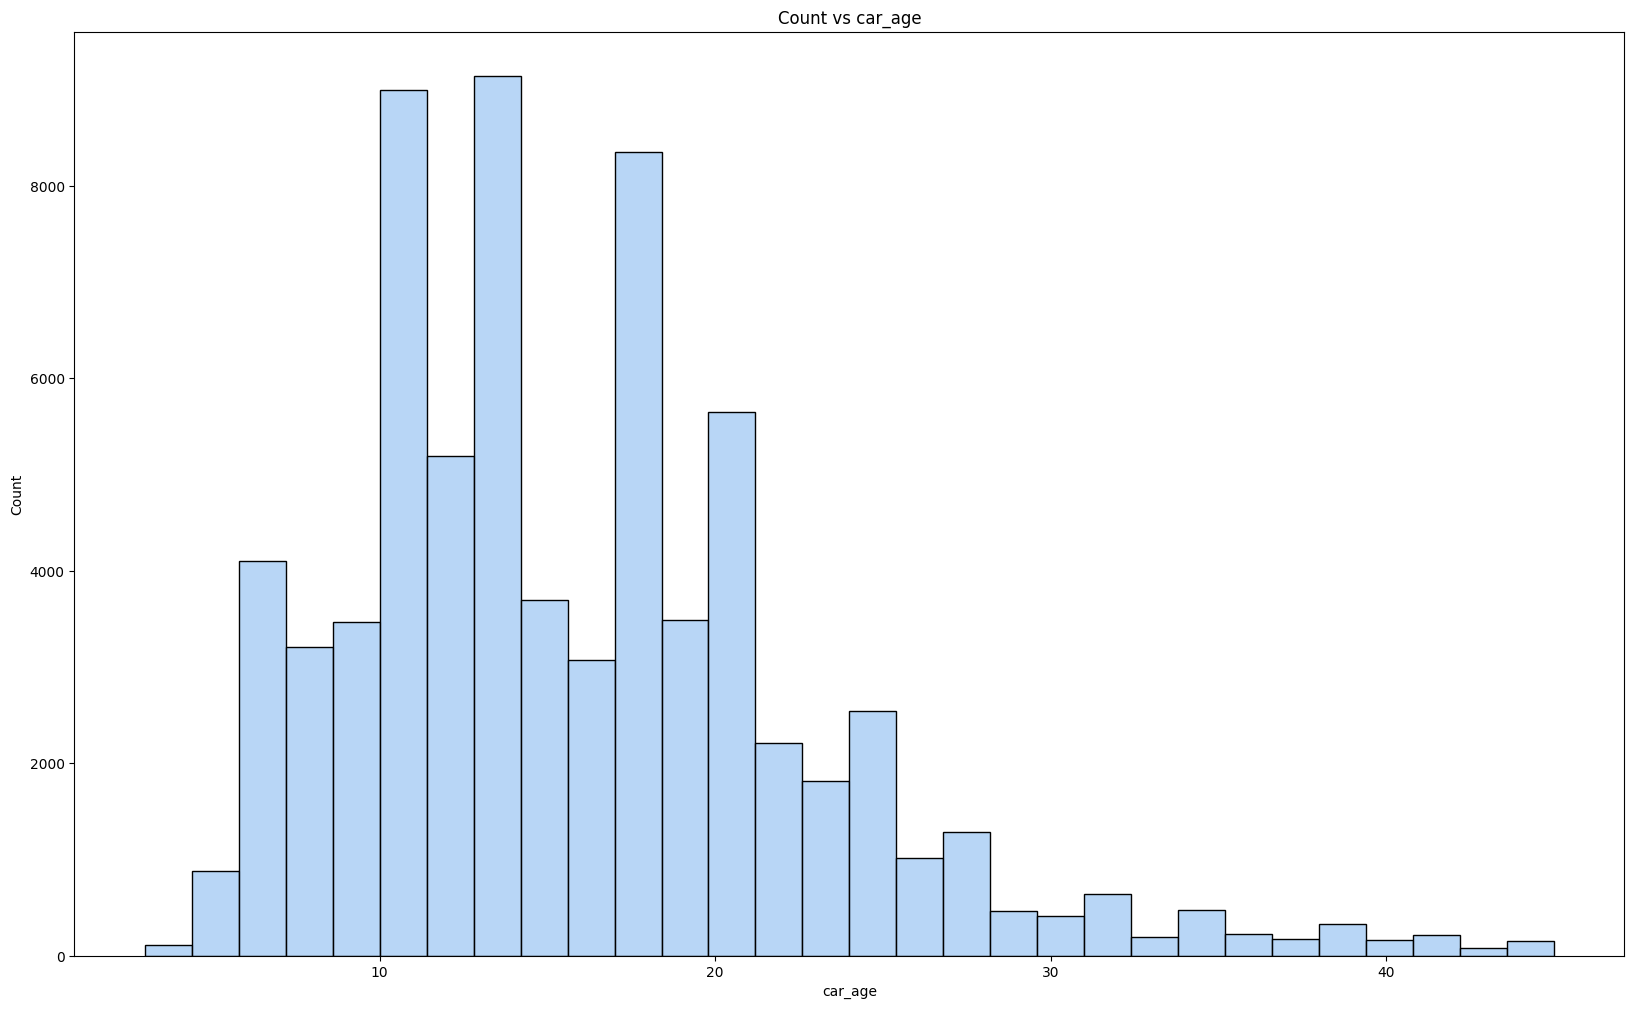

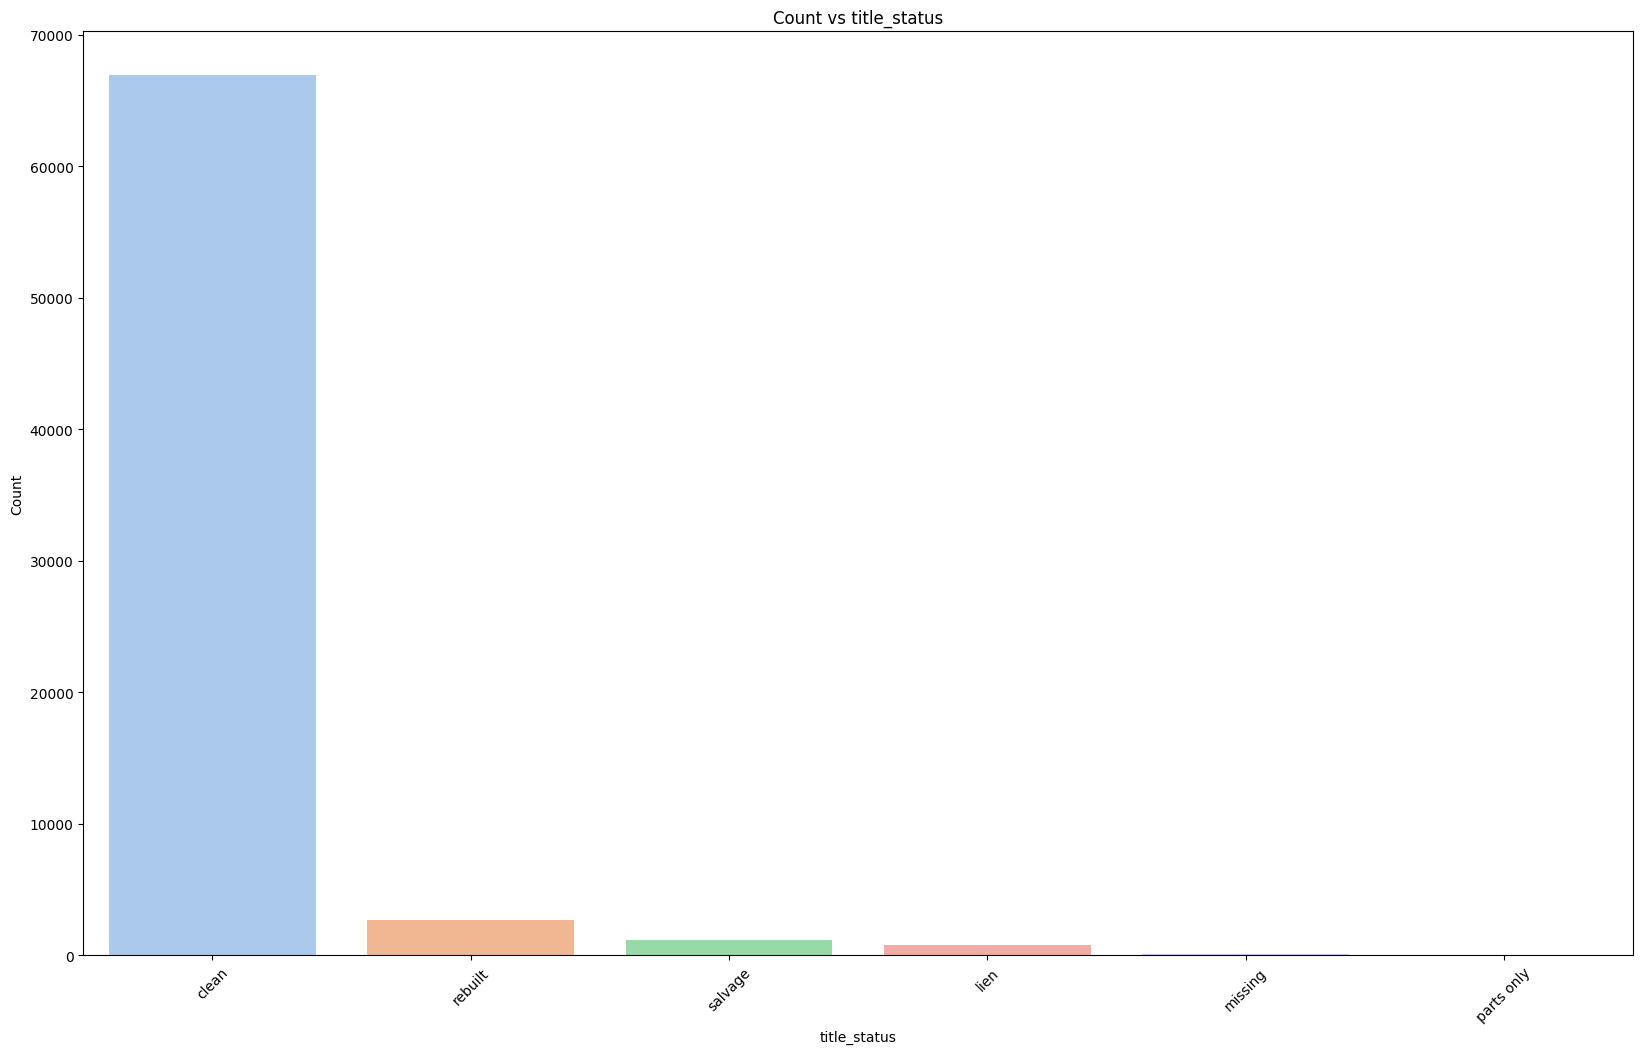

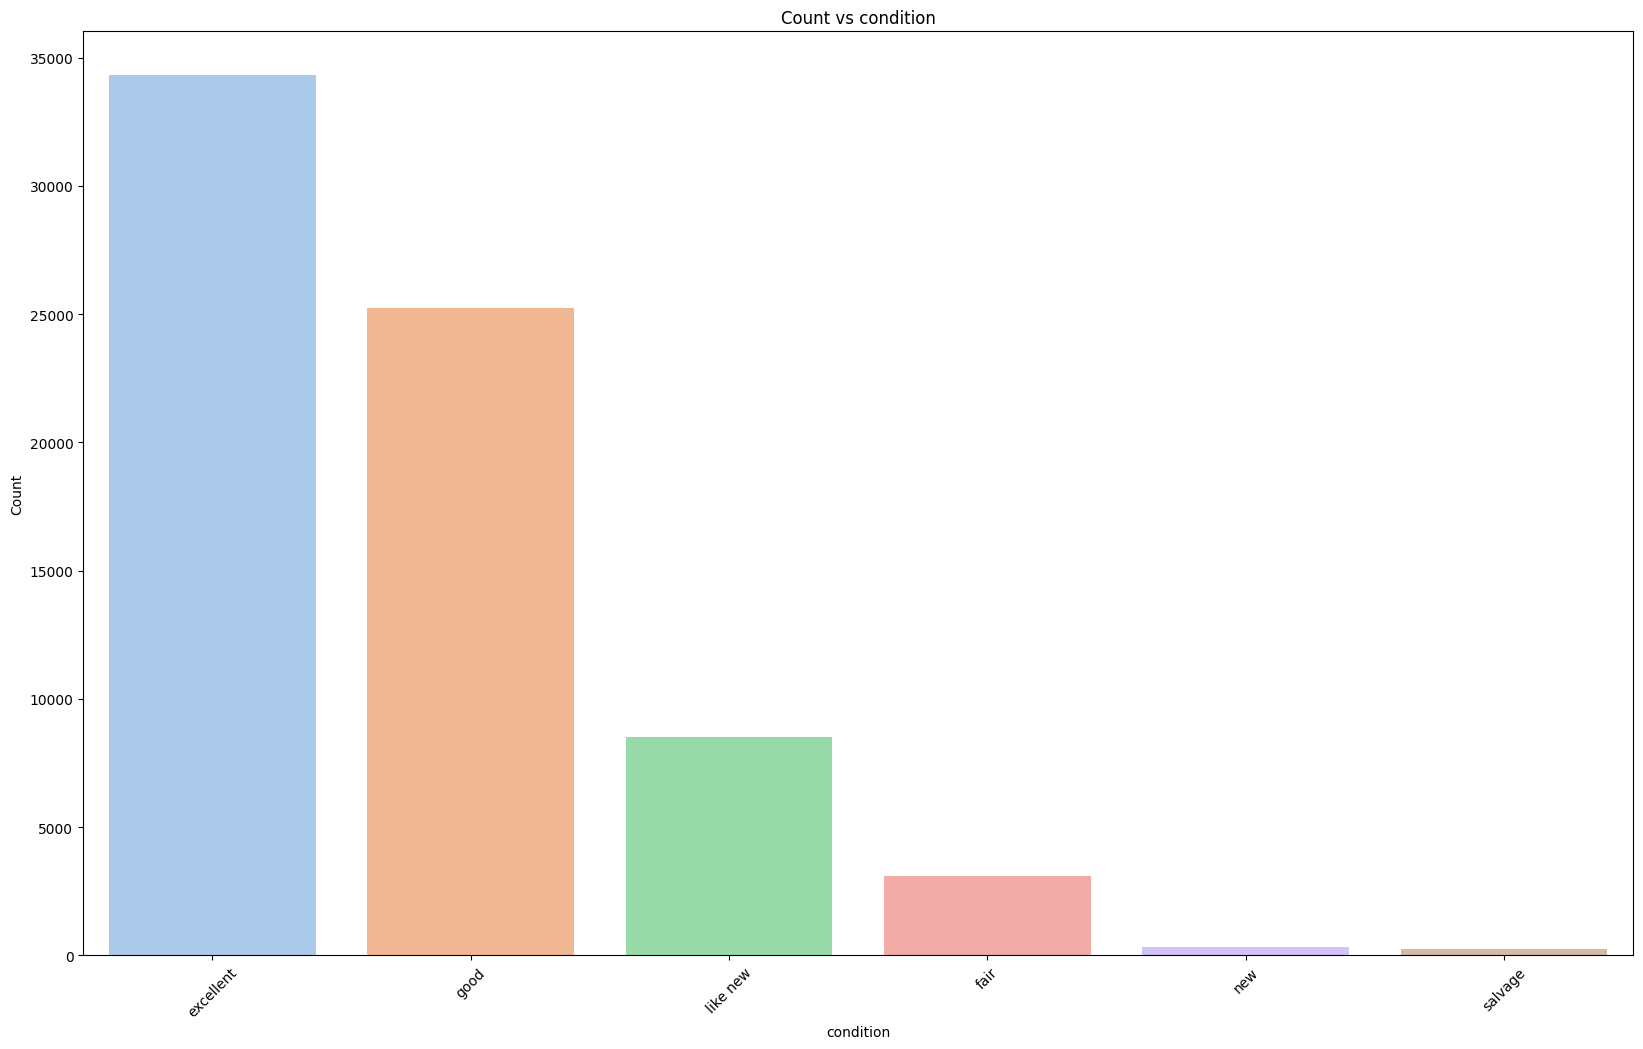

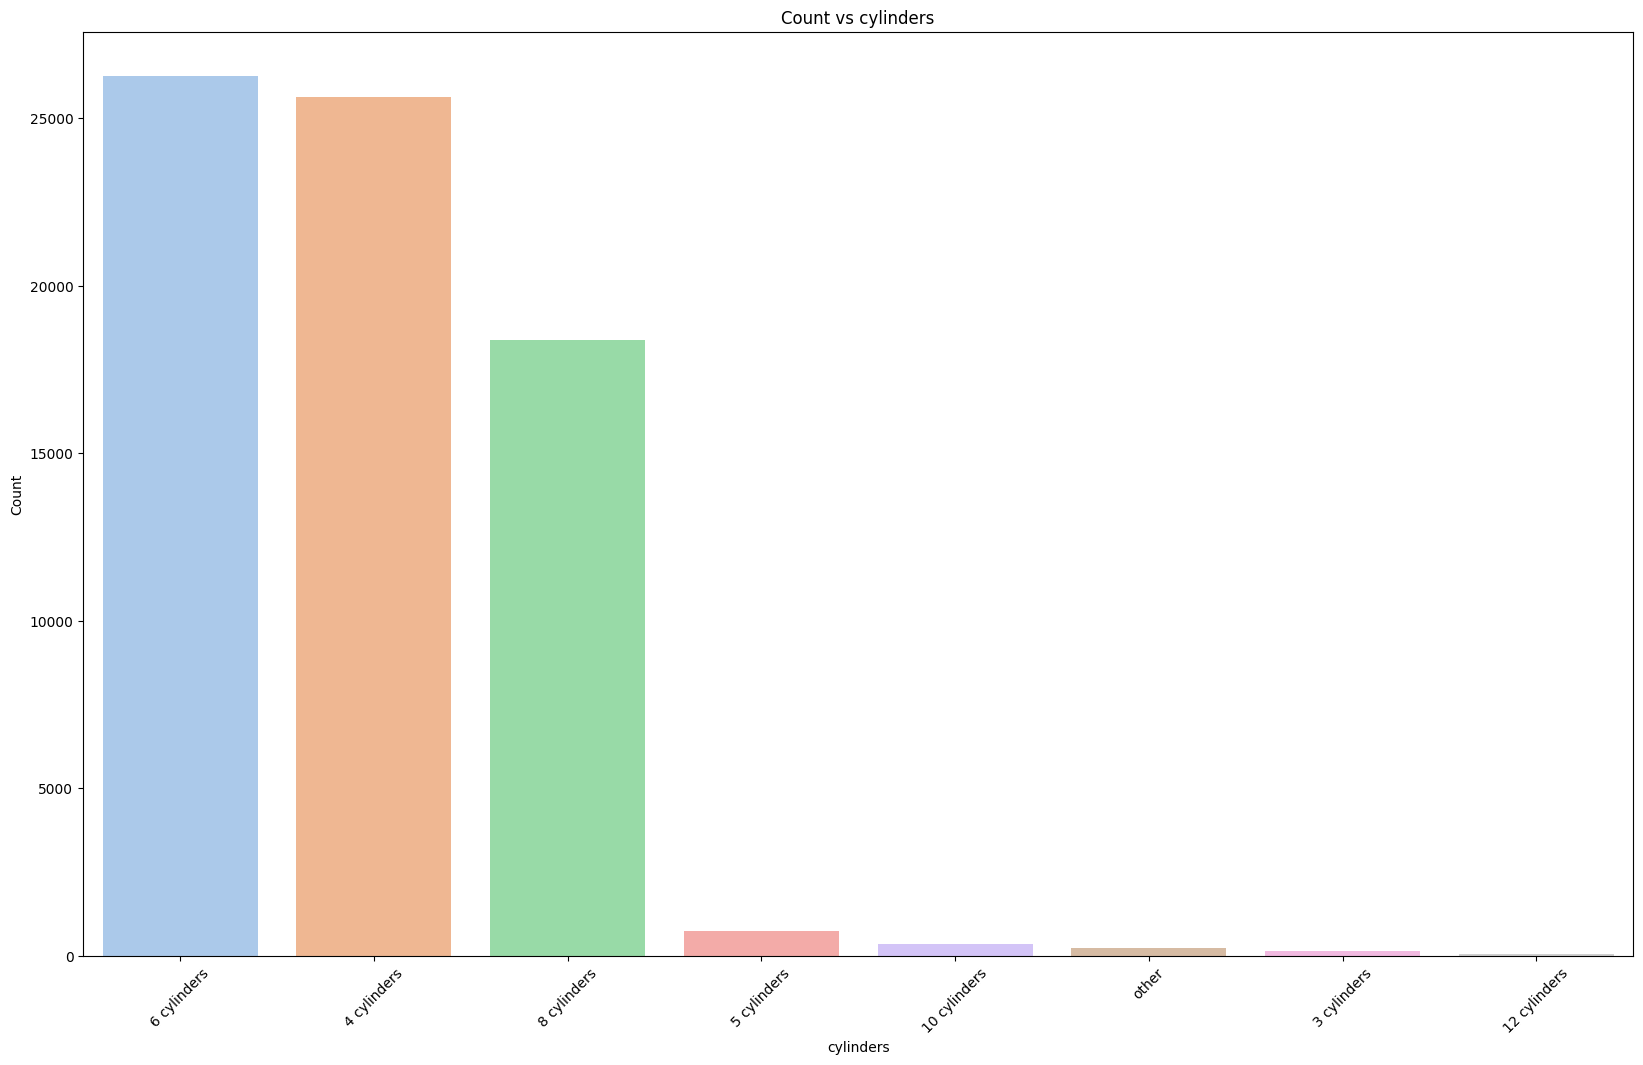

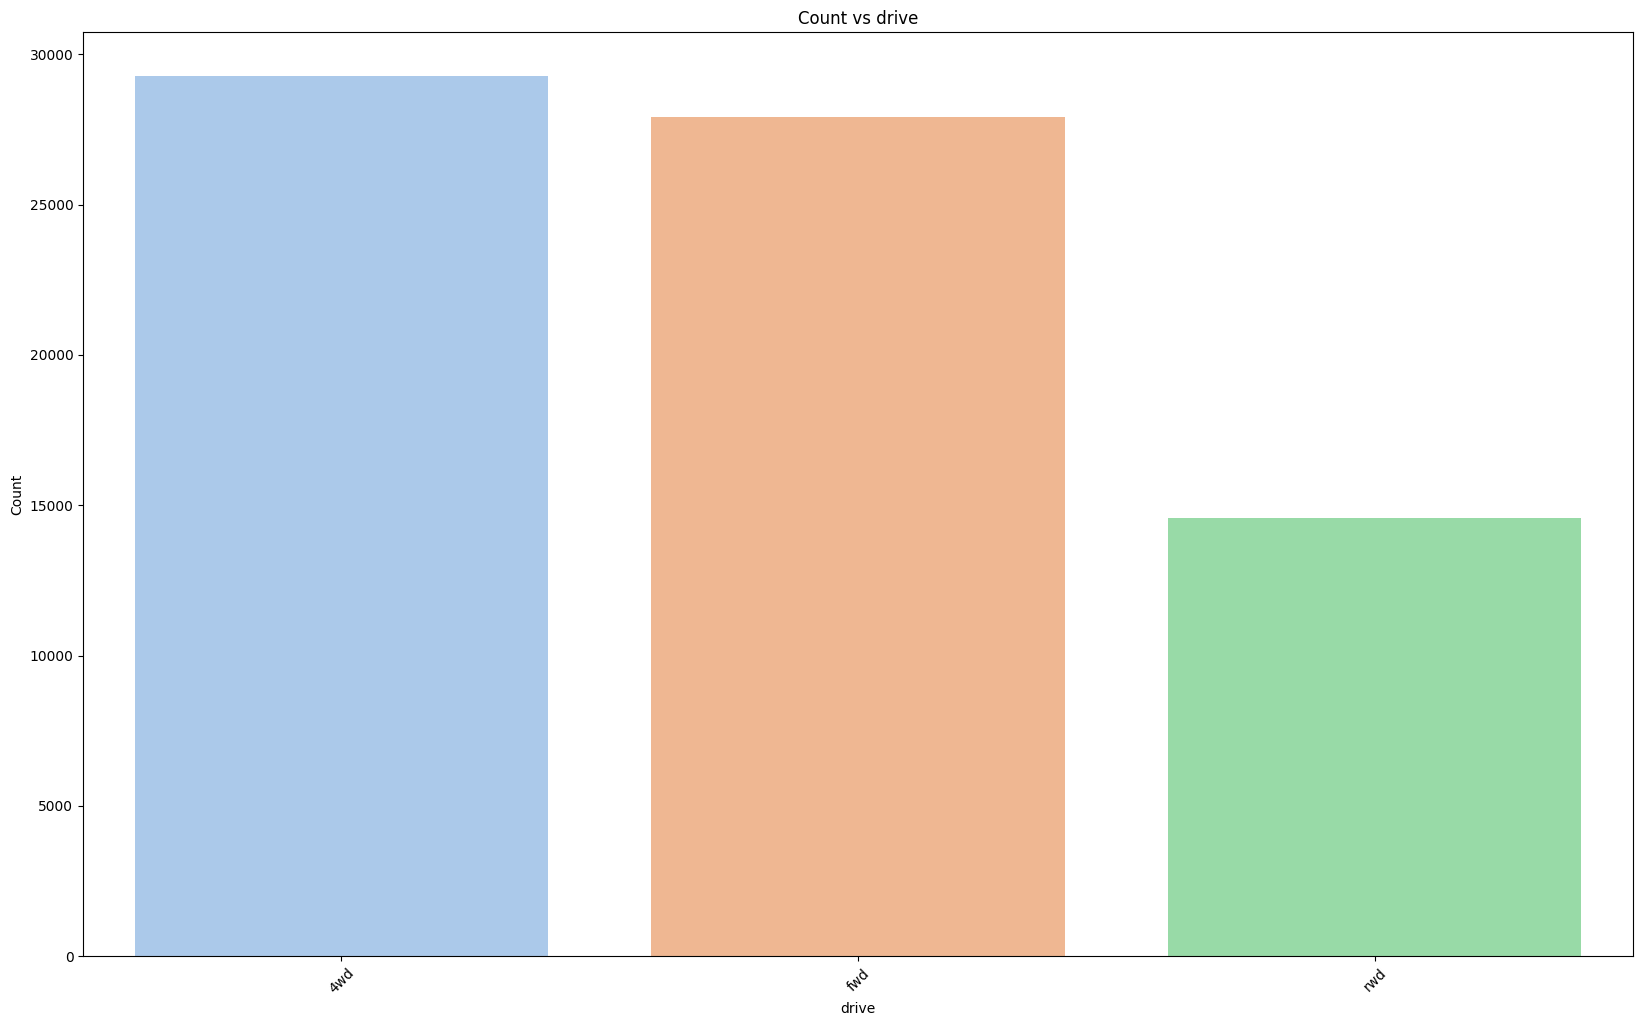

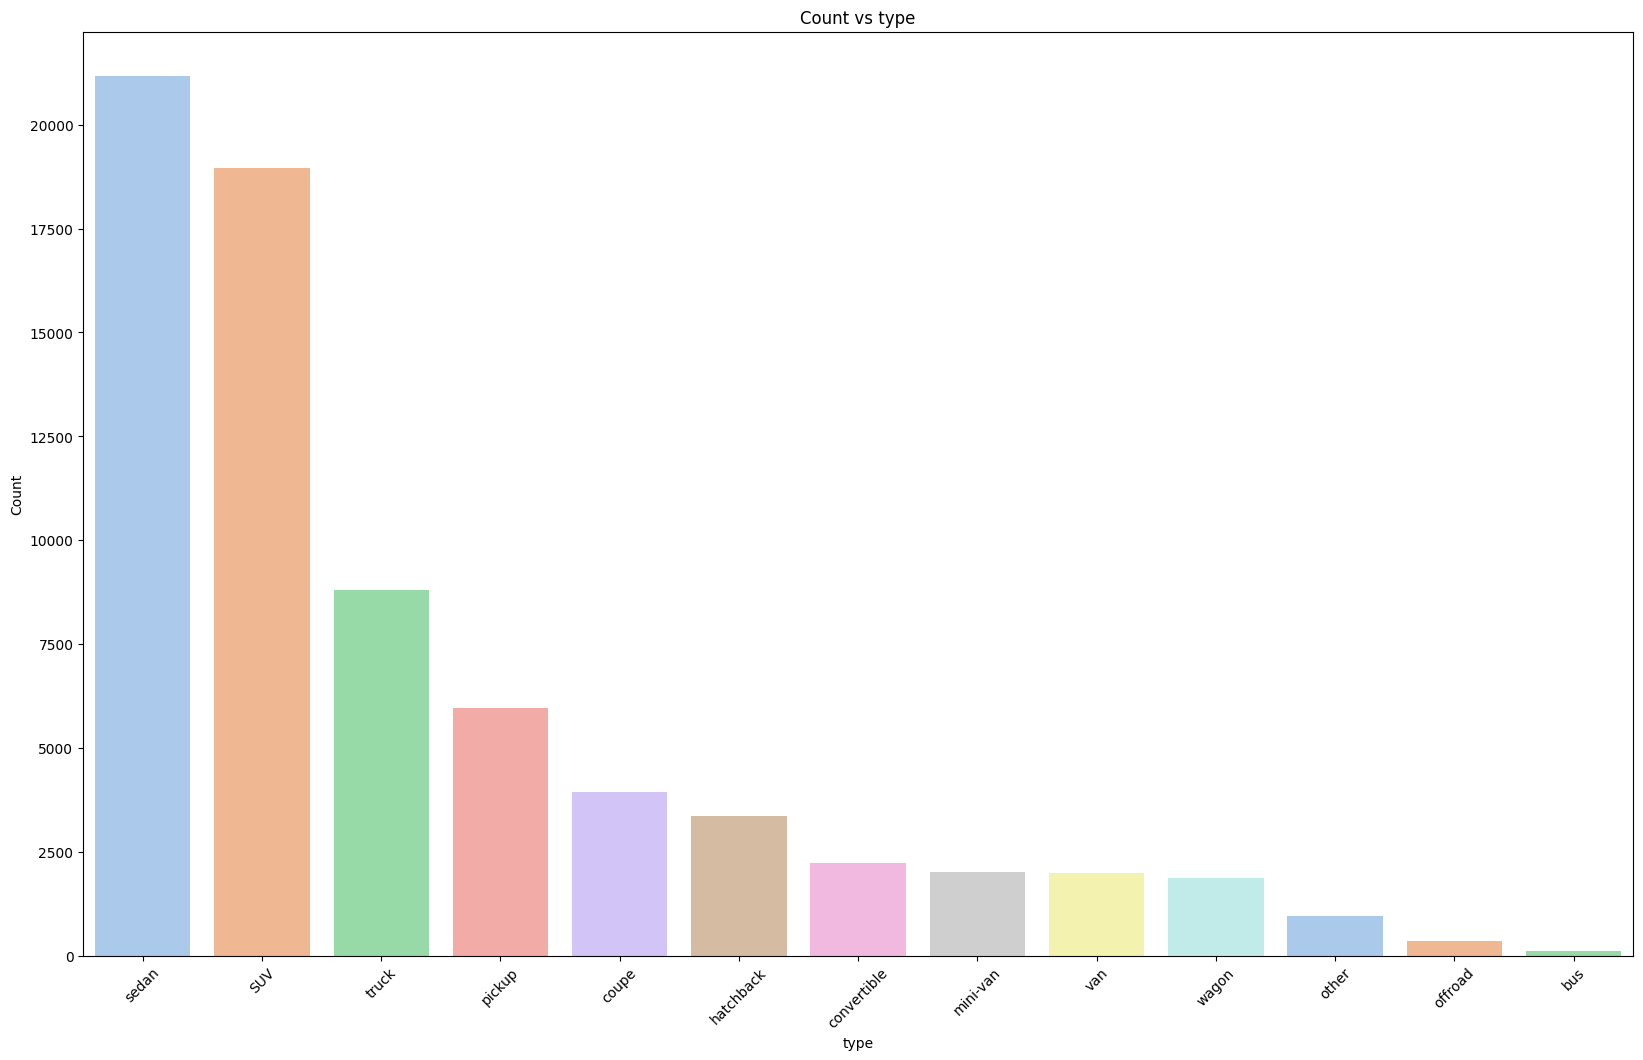

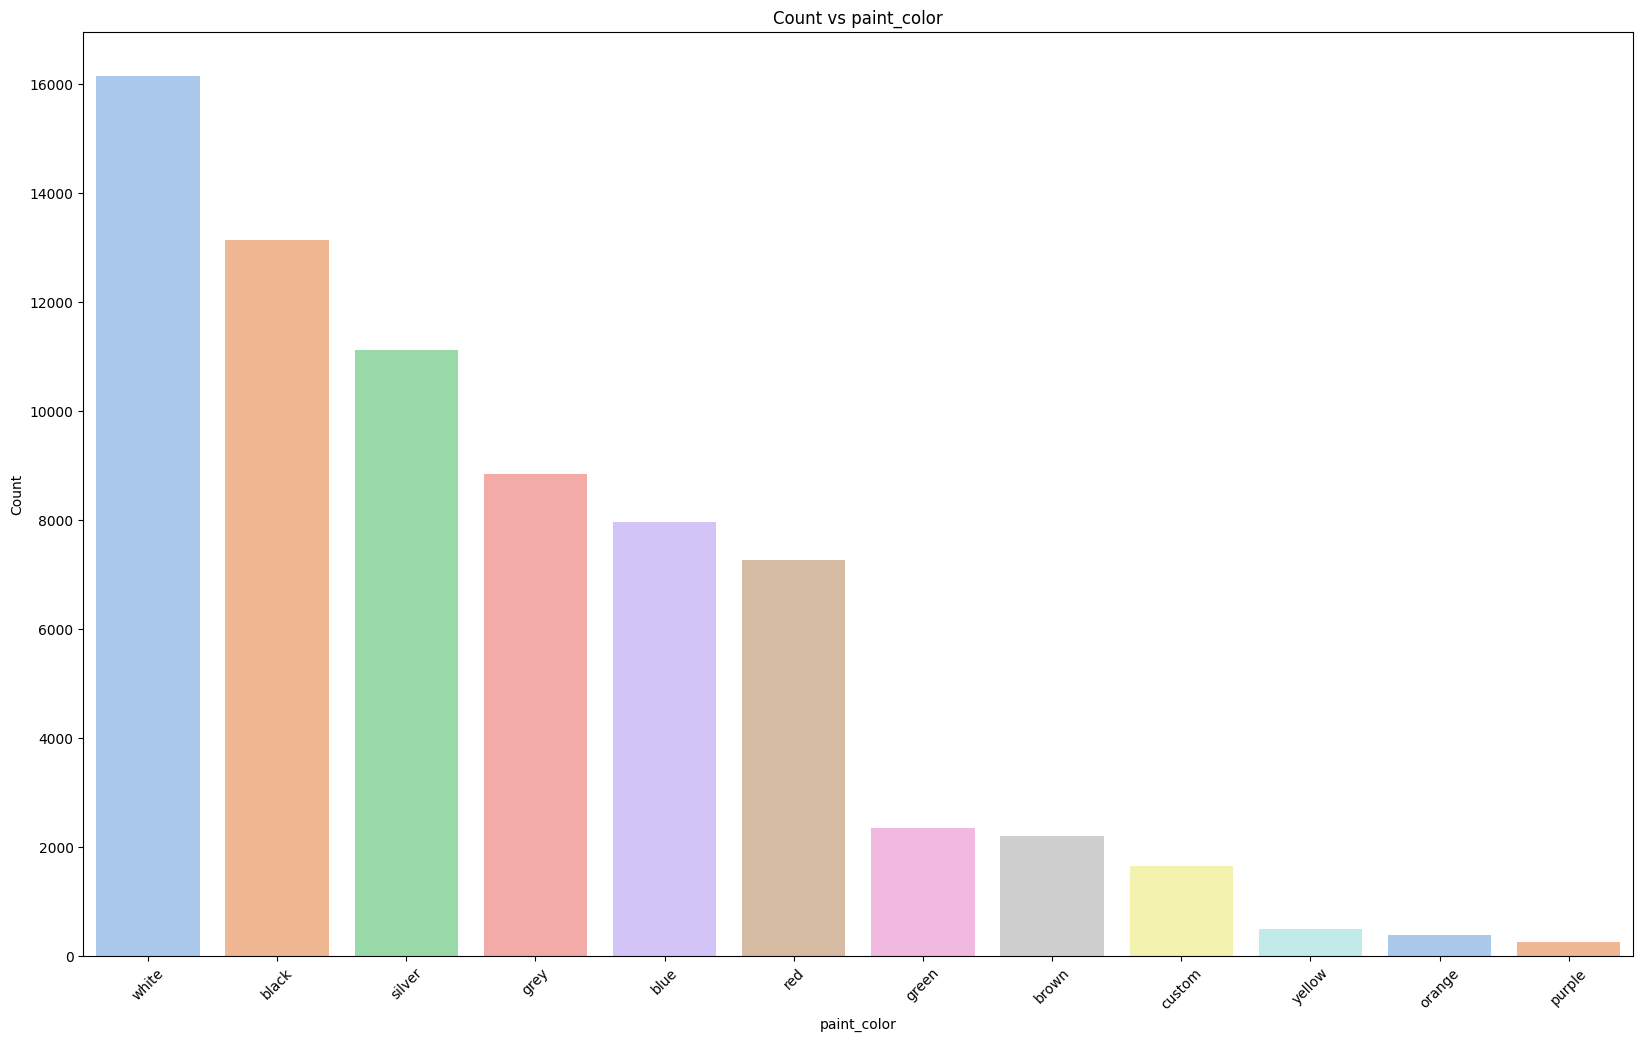

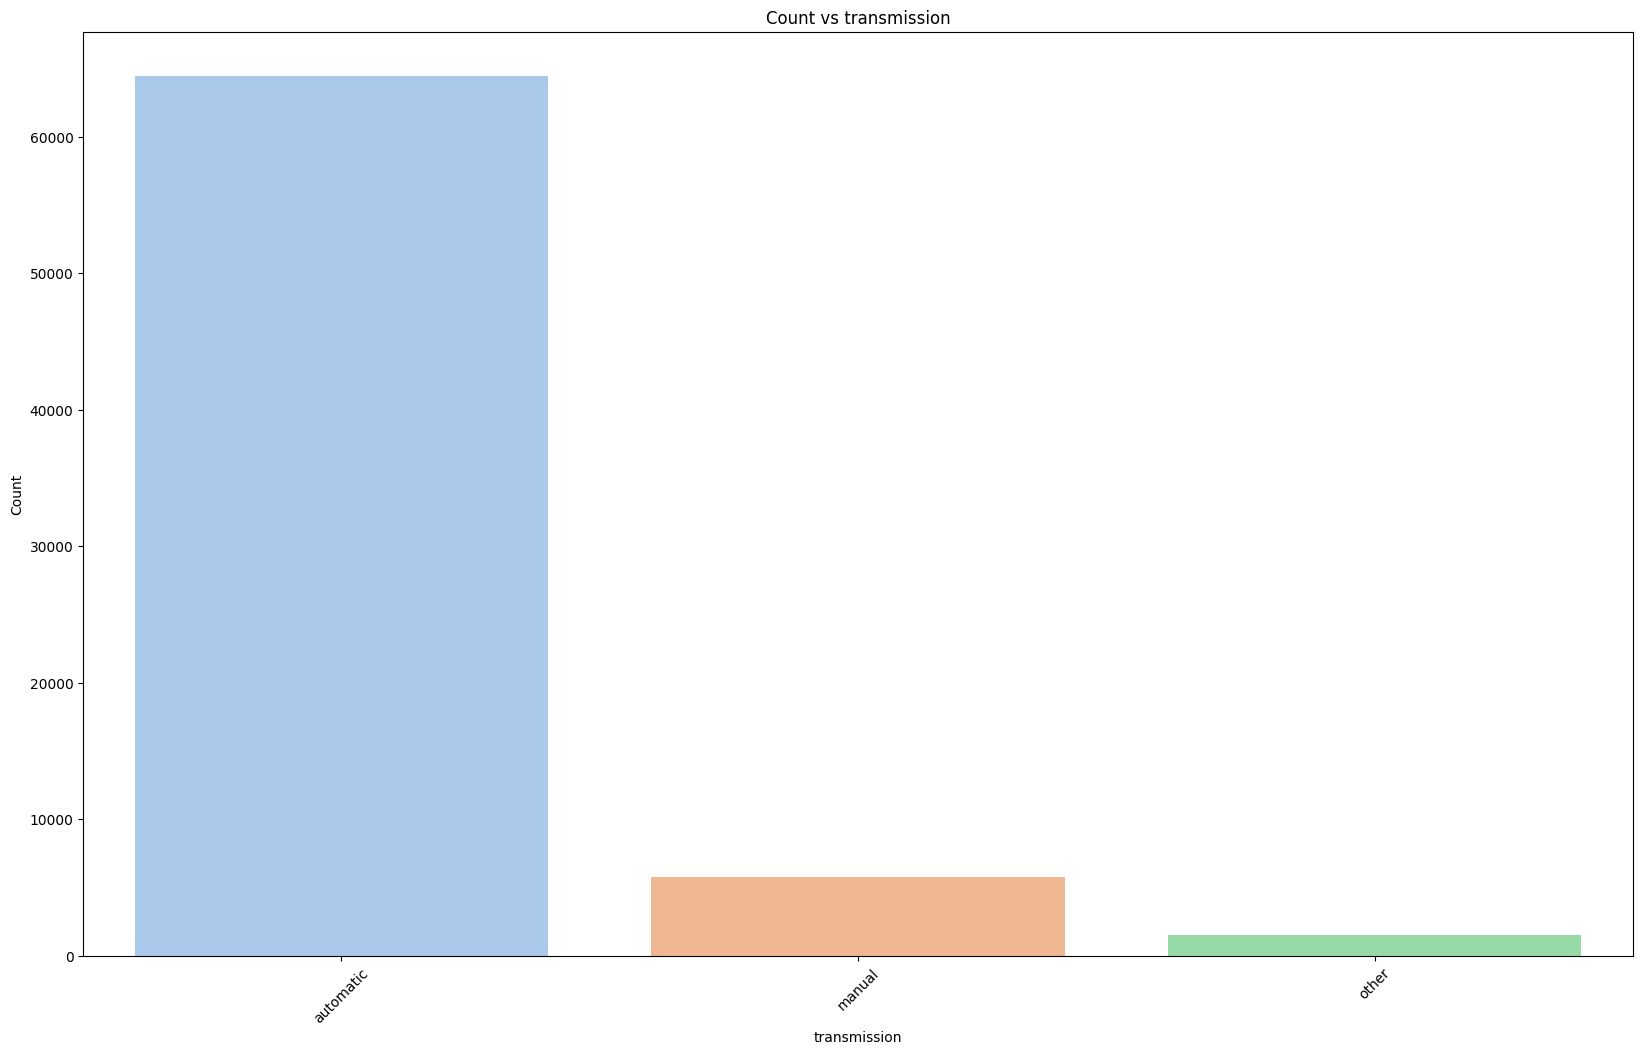

In [157]:
# Price vs Features
plot_price_vs_feature(df_model_Cat, 'odometer', kind='scatter')
plot_price_vs_feature(df_model_Cat, 'car_age', kind='scatter')
plot_price_vs_feature(df_model_Cat, 'manufacturer', kind='bar')
plot_price_vs_feature(df_model_Cat, 'fuel', kind='bar')
plot_price_vs_feature(df_model_Cat, 'transmission', kind='bar')
plot_price_vs_feature(df_model_Cat, 'title_status', kind='bar')
plot_price_vs_feature(df_model_Cat, 'condition', kind='bar')
plot_price_vs_feature(df_model_Cat, 'cylinders', kind='bar')
plot_price_vs_feature(df_model_Cat, 'drive', kind='bar')
plot_price_vs_feature(df_model_Cat, 'type', kind='bar')
plot_price_vs_feature(df_model_Cat, 'paint_color', kind='bar')



# Count vs Features
plot_count_vs_feature(df_model_Cat, 'manufacturer', kind='bar')
plot_count_vs_feature(df_model_Cat, 'fuel', kind='bar')
plot_count_vs_feature(df_model_Cat, 'odometer', kind='hist')
plot_count_vs_feature(df_model_Cat, 'car_age', kind='hist')
plot_count_vs_feature(df_model_Cat, 'title_status', kind='bar')
plot_count_vs_feature(df_model_Cat, 'condition', kind='bar')
plot_count_vs_feature(df_model_Cat, 'cylinders', kind='bar')
plot_count_vs_feature(df_model_Cat, 'drive', kind='bar')
plot_count_vs_feature(df_model_Cat, 'type', kind='bar')
plot_count_vs_feature(df_model_Cat, 'paint_color', kind='bar')
plot_count_vs_feature(df_model_Cat, 'transmission', kind='bar')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [165]:
# Select relevant features to reduce dimensionality
simple_features = [
     'manufacturer', 'condition', 'cylinders', 'fuel',
    'odometer', 'title_status', 'transmission', 'drive', 'type', 'car_age'
]

# Create working dataset with selected features and target
df_simple = df_model_Cat[simple_features + ['price']].copy()

# Encode categorical features
label_encoders = {}
for col in df_simple.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_simple[col] = le.fit_transform(df_simple[col])
    label_encoders[col] = le

# Define features and target
X = df_simple.drop(columns='price')
y = df_simple['price']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split off a small training sample for speed
X_sample, _, y_sample, _ = train_test_split(X_scaled, y, train_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=1000),
    'Decision Tree': DecisionTreeRegressor(max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, max_depth=5)
}

# Train, predict and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_sample, y_sample)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mse)
    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model  R2 Score          MAE           MSE         RMSE
5  Gradient Boosting  0.792102  3054.304011  2.199625e+07  4690.015757
4      Random Forest  0.777235  3208.617910  2.356922e+07  4854.813907
3      Decision Tree  0.714175  3566.470430  3.024111e+07  5499.192077
1   Ridge Regression  0.527147  5048.995169  5.002917e+07  7073.129825
2   Lasso Regression  0.527147  5048.996899  5.002917e+07  7073.129946
0  Linear Regression  0.527147  5049.000492  5.002919e+07  7073.131490


From the above the Gradient Boosting seems to be most effective modeling that can use used for this usecase with a R2 Score 0.792102 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

        Feature  Mean Importance  Std Importance
9       car_age         0.622457        0.006616
2     cylinders         0.226671        0.004053
4      odometer         0.182584        0.002392
7         drive         0.062387        0.001296
3          fuel         0.058306        0.001539
8          type         0.031263        0.000910
0  manufacturer         0.021758        0.000574
1     condition         0.014927        0.000496
5  title_status         0.012070        0.000814
6  transmission         0.003061        0.000220


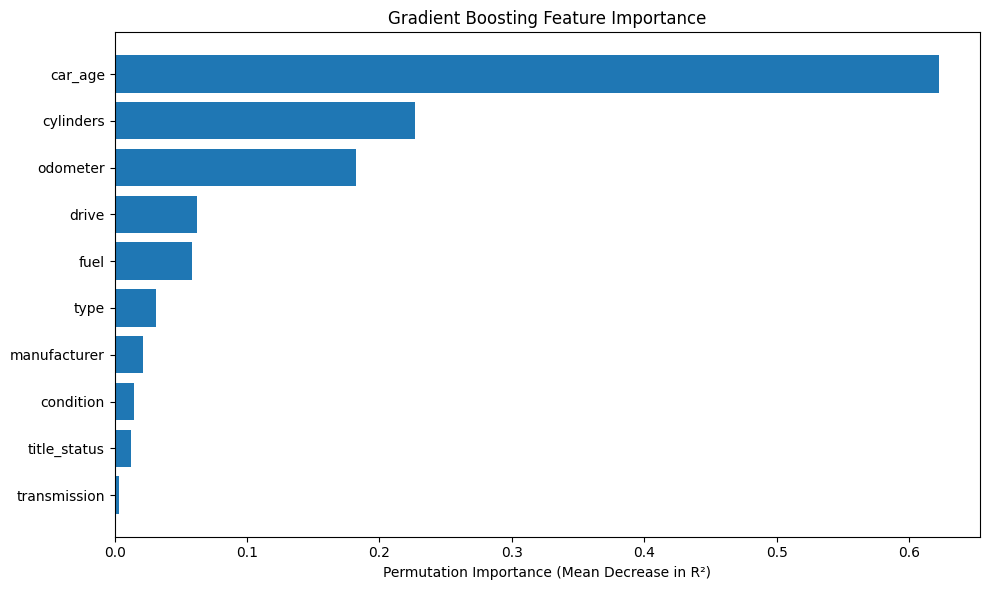

In [166]:
# Train Gradient Boosting evaluation
# Using the full training set for better performance
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5)
gb_model.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(gb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create importance DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Mean Importance": result.importances_mean,
    "Std Importance": result.importances_std
}).sort_values(by="Mean Importance", ascending=False)

# Display
print(importance_df)

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Mean Importance"])
plt.xlabel("Permutation Importance (Mean Decrease in R²)")
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Factors impacting Price
- Low Odometer => higher Price
- Lower car age => higher Price
- Car condition new => Higher Price
- Car has higher Cylinders => Higher Price
- 4WD  => Drives the price higher
- White color cars have a higher price and they seems to sell more white cars

### Factors affecting Sales
- Top Selling Manufactures -
	Ford, Chevrolet, Toyota, Honda, Nissan are top movers
- Gas cars sells disproportionally more than other fuel types
- Cars with Odometer less than 10 K sells more
- Car age less than 7 to 15 years sells more
- Clean title and excellent condition  sells faster
- 6 Cylinder and AWD seems to be preferred more 
- Sedans are top sellers followed by SUV and Trucks
- Automatic cars sells disproportionately high


But from all of the features The Car Age, Cylinder and Odometer plays a big factor -  Cars with Low Odometer, 6 cylinder and under 15 years will fetch higher price and will sell faster
 